In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
!pip install -r requirements.txt

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import pickle
import gensim
data = pickle.load(open("image_vectors.p", "rb"))
word_vector = pickle.load(open("word_vector_min_bird.p", "rb"))
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

768
11840
11840
Black_Footed_Albatross_0001_796111.jpg
Black_Footed_Albatross_0001_796111.jpg
Black_Footed_Albatross_0002_55.jpg
Black_Footed_Albatross_0003_796136.jpg
Black_Footed_Albatross_0005_796090.jpg
Black_Footed_Albatross_0006_796065.jpg
Black_Footed_Albatross_0007_796138.jpg
Black_Footed_Albatross_0008_796083.jpg
Black_Footed_Albatross_0009_34.jpg


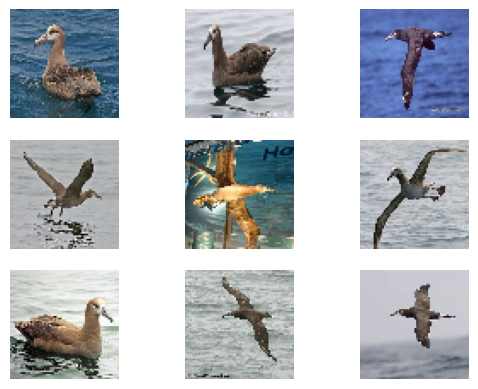

In [4]:

import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import expand_dims
from random import randint, choice

def random_flip(image):
    image = tf.image.flip_left_right(image)
    return image.numpy()

def random_jitter(image):
    image = expand_dims(image, 0) #add additional dimension necessary for zooming
    image = image_augmentation_generator.flow(image, batch_size=1)
    result = image[0].reshape(image[0].shape[1:]) #remove additional dimension (1, 64, 64, 3) to (64, 64, 3)
    return result

image_augmentation_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.8, 1.0]) # random zoom proves to be helpful in capturing more details https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

n = 227
image_embeddings = []
captions = []
labels = []
for i, k in enumerate(data.keys()):
    image_embeddings.append(data[k])
    captions.append(word_vector[k])
    #print(word_vector[k])
    labels.append(k)
    #print(k)
    if i % n == 0:
        image_embeddings.append(random_jitter(data[k]))
        captions.append(word_vector[k])
        labels.append(k)

print(len(word_vector[k]))
print(len(captions))
print(len(image_embeddings))

pyplot.axis('off')
slcie = image_embeddings[40:50]
for i in range(9):
    pyplot.subplot(3, 3, i+1)
    pyplot.imshow(array_to_img(slcie[i]))
    print(labels[i])
    pyplot.axis('off')

pyplot.show()

In [5]:
import numpy as np

def get_random_word_vectors_from_dataset(n_samples):
  ix = np.random.randint(0, len(captions), n_samples)
  return np.asarray(captions)[ix]


In [6]:
choice(model.index_to_key)

'Pamour'

In [7]:
len(model[choice(model.index_to_key)])

300

In [8]:
result_array = np.empty((0, 300))

In [9]:
choice(model.index_to_key)

'di_ve'

In [10]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 300))
    for i in range(1):
     result_array = np.append(result_array, [model[choice(model.index_to_key)]], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [11]:
import tensorflow_hub as hub
import tensorflow_text
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_model = hub.KerasLayer(encoder_url)

In [12]:
def create_sent_vector(sent):
    sent = [sent]
    text_preprocessed = bert_preprocess_model(sent)
    final = bert_model(text_preprocessed)
    return final['pooled_output'].numpy()

In [13]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 300))
    for i in range(1):
     result_array = np.append(result_array, [model[choice(model.index_to_key)]], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [14]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 768))
    for i in range(1):
     result_array = np.append(result_array, lbs[randint(0,11830)], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [15]:
def generate_random_vectors(n_samples):  
    vectorized_random_captions = []
    #print(n_samples)
    for n in range(n_samples): #batch size
        rnd = randint(8, 25) # number of tokens in a sentence
        result_array = np.empty((0, 768)) #embedding size (will change)
        rand_sentence = []
        s = ''
        for i in range(rnd):
            if (i==rnd-1):
                s = s + choice(model.index_to_key)
                continue
            s = s + choice(model.index_to_key) + ' '
            #rand_sentence.append(choice(model.index_to_key))
            #result_array = np.append(result_array, [model[choice(model.index_to_key)]], axis=0) #embedding vector for the sentence
        result_array = np.append(result_array, create_sent_vector(s),axis =0 )
        #print(result_array.shape)
        rand_sentence.append(s)
        #result_array = np.append(result_array, rand_sentence, axis=0)
        vectorized_random_captions.append(result_array.astype('float32')) # final list

    return np.array(vectorized_random_captions).reshape(n_samples,768)

In [16]:
#lbs[1].reshape(1,768)

In [17]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 768))
    for i in range(rnd):
     result_array = np.append(result_array, lbs[randint(0,11830)].reshape(1,768), axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [18]:
#lola = generate_random_vectors(32)

In [19]:
#type(lola)

In [20]:
#lola.shape

In [21]:
from keras.preprocessing.image import array_to_img

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy import asarray
import numpy as np

import os
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from numpy.random import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from numpy.random import randn
from numpy.random import randint
import time
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.utils import plot_model

In [22]:


# Discriminator model
def define_discriminator():
    word_vector_dim = 768
    dropout_prob = 0.4

    in_label = layers.Input(shape=(768,))
    li = layers.BatchNormalization()(in_label)
    li = layers.Dense(300)(li)
    
    n_nodes = 3 * 64 * 64
    li = layers.Dense(n_nodes)(li)
    li = layers.Reshape((64, 64, 3))(li)

    dis_input = layers.Input(shape=(64, 64, 3))

    merge = layers.Concatenate()([dis_input, li])

    discriminator = layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(merge)
    discriminator = layers.LeakyReLU(0.2)(discriminator)
    discriminator = layers.GaussianNoise(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU()(discriminator)

    discriminator = layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Flatten()(discriminator)

    discriminator = layers.Dense(1024)(discriminator)

    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Dense(1)(discriminator)

    discriminator_model = Model(inputs=[dis_input, in_label], outputs=discriminator)

    #discriminator_model.summary()

    return discriminator_model


def resnet_block(model, kernel_size, filters, strides):
    gen = model
    model = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1, 2])(model)
    model = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = layers.Add()([gen, model])
    return model


# Generator model
def define_generator():
    kernel_init = tf.random_normal_initializer(stddev=0.02)
    batch_init = tf.random_normal_initializer(1., 0.02)

    random_input = layers.Input(shape=(100,))
    text_input1 = layers.Input(shape=(768,))
    text_layer1 = layers.BatchNormalization()(text_input1)
    text_layer1 = layers.Dense(300)(text_layer1)
    
    text_layer2 = layers.Dense(8192)(text_layer1)
    text_layer3 = layers.Reshape((8, 8, 128))(text_layer2)

    n_nodes = 128 * 8 * 8
    gen_input_dense = layers.Dense(n_nodes)(random_input)
    generator = layers.Reshape((8, 8, 128))(gen_input_dense)

    merge = layers.Concatenate()([generator, text_layer3])

    model = layers.Conv2D(filters=64, kernel_size=9, strides=1, padding="same")(merge)
    model = tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1, 2])(model)

    gen_model = model

    for _ in range(4):
      model = resnet_block(model, 3, 64, 1)

    model = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = layers.Add()([gen_model, model])

    model = layers.Conv2DTranspose(filters=512, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2D(3, (3, 3), padding='same', activation='tanh')(model)

    generator_model = Model(inputs=[random_input, text_input1], outputs=model)

    #generator_model.summary()

    return generator_model

In [23]:
g_plot = define_generator()

In [24]:
from tensorflow.keras.utils import plot_model

In [25]:
!apt install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [26]:
!pip install pydot
!pip install graphviz
!pip install pydotplus

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [27]:
import pydot
import pydotplus
import graphviz


In [28]:
disc_plot = define_discriminator()

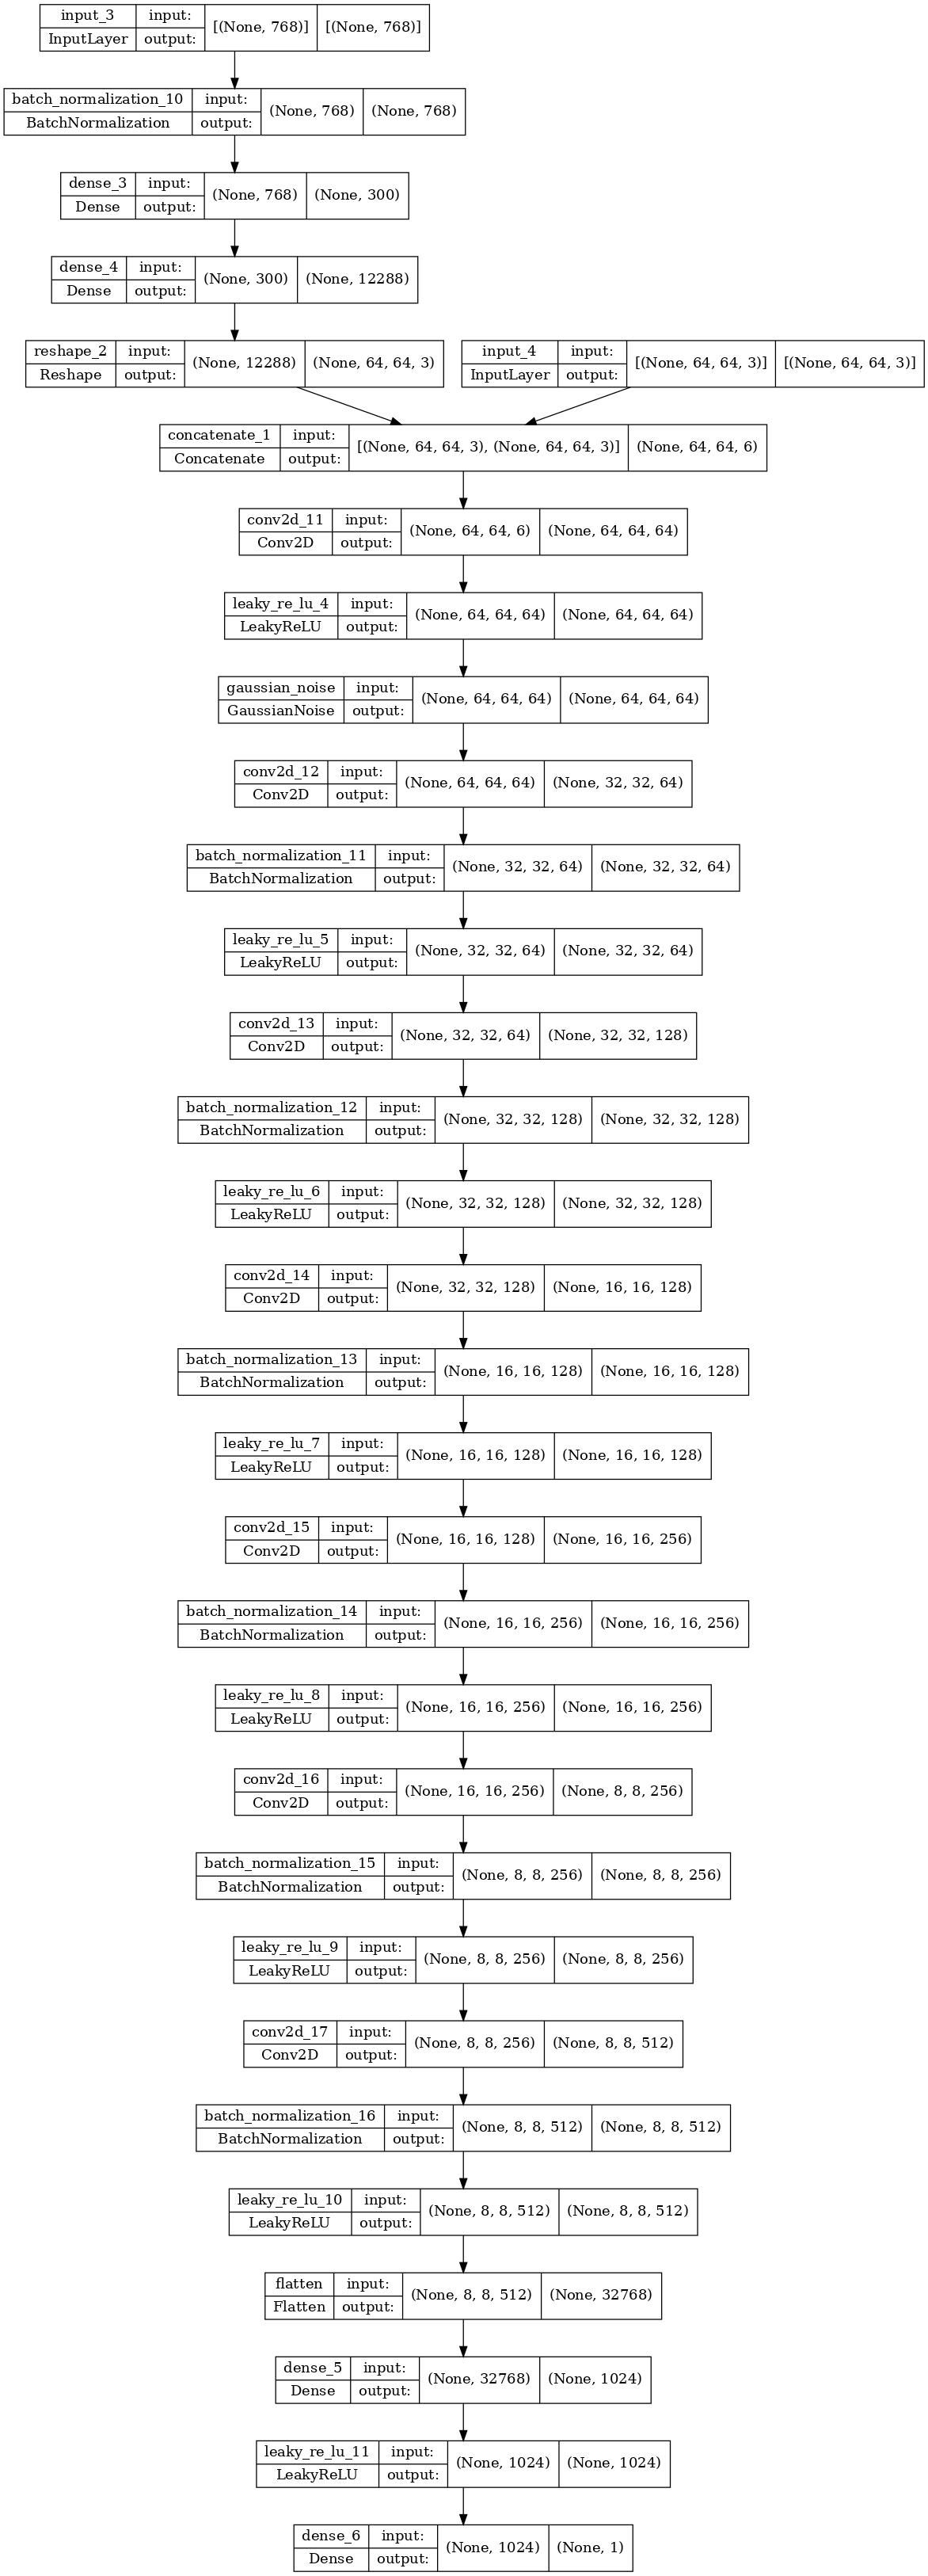

In [29]:
plot_model(disc_plot,to_file="disc_model_bert_batnorm.png",show_shapes=True,dpi=92)

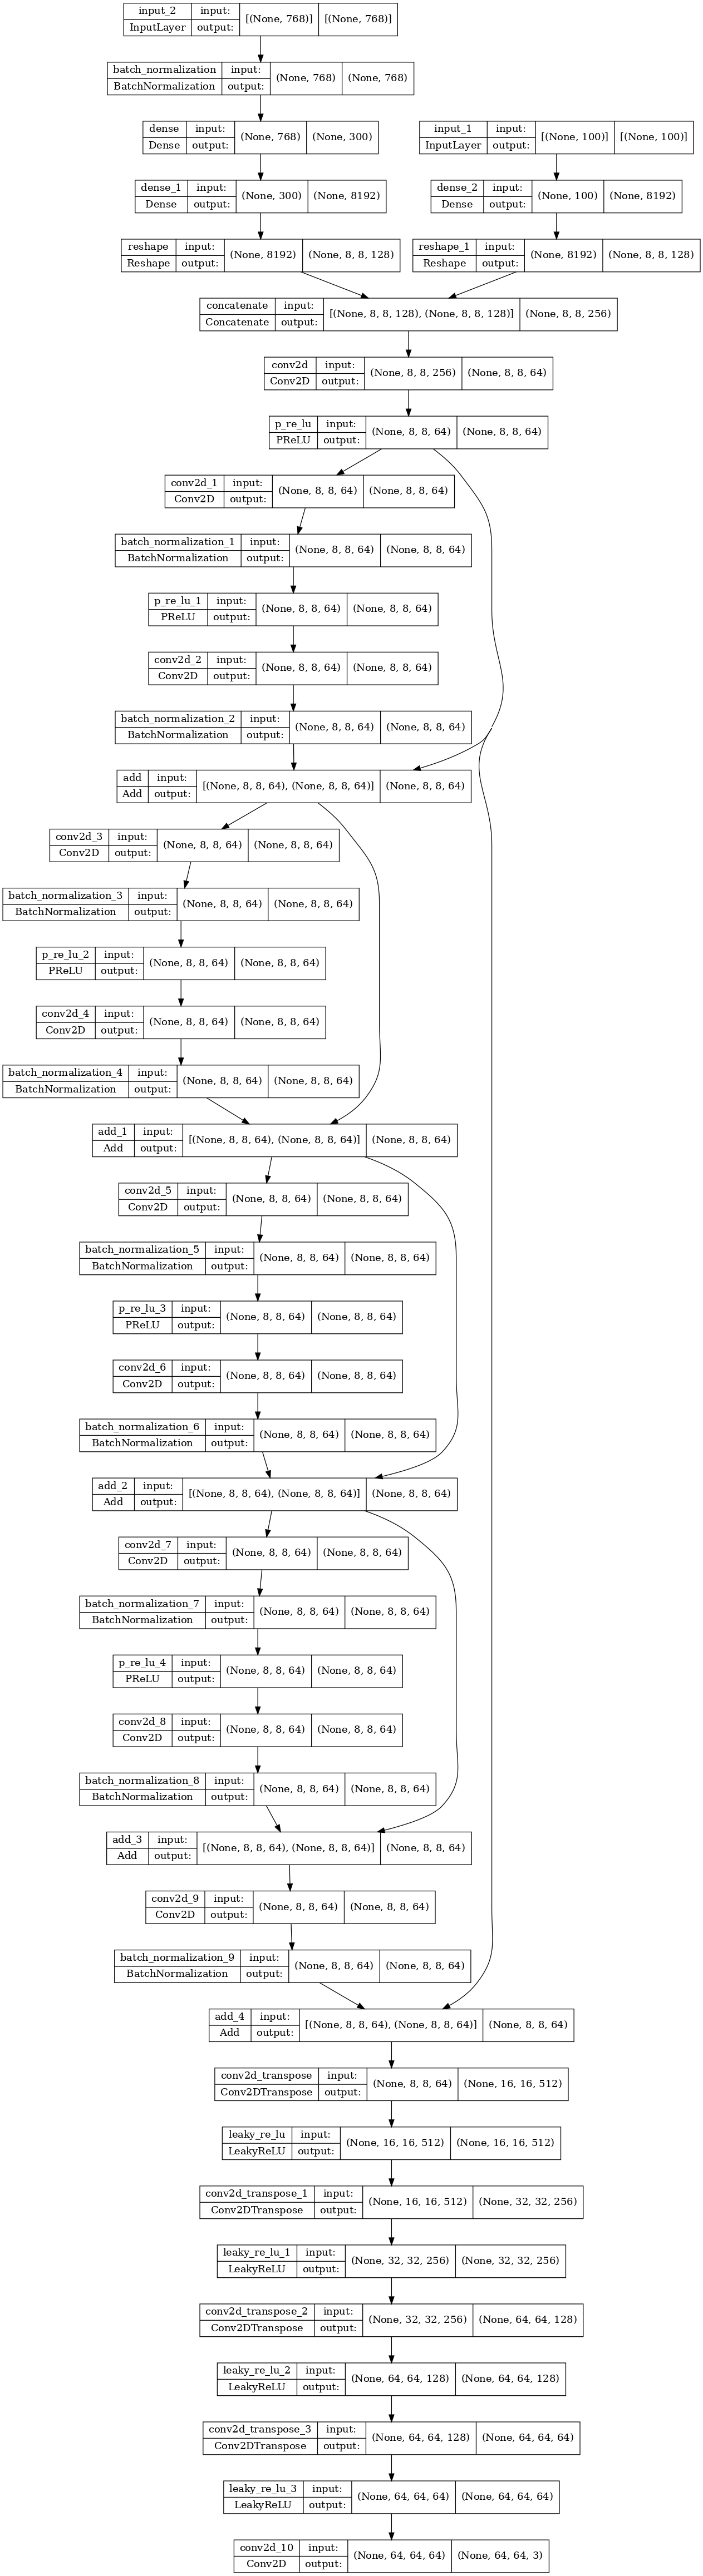

In [30]:
plot_model(g_plot,to_file="gen_model_bert_batnorm.png",show_shapes=True,dpi=92)

In [31]:
g_plot.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 768)         3072        ['input_2[0][0]']                
 alization)                                                                                       
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 300)          230700      ['batch_normalization[0][0]']

                                                                                                  
 add_3 (Add)                    (None, 8, 8, 64)     0           ['add_2[0][0]',                  
                                                                  'batch_normalization_8[0][0]']  
                                                                                                  
 conv2d_9 (Conv2D)              (None, 8, 8, 64)     36928       ['add_3[0][0]']                  
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 8, 8, 64)    256         ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 add_4 (Add)                    (None, 8, 8, 64)     0           ['p_re_lu[0][0]',                
          

In [32]:
from IPython.display import clear_output


def generate_latent_points(latent_dim, n_samples):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions = get_random_word_vectors_from_dataset(n_samples)
    return [x_input, text_captions]

# Randomly flip some labels. Credits to https://machinelearningmastery.com/how-to-code-generative-adversarial-network-hacks/
def noisy_labels(y, p_flip):
    n_select = int(p_flip * int(y.shape[0]))
    flip_ix = np.random.choice([i for i in range(int(y.shape[0]))], size=n_select)

    op_list = []
    for i in range(int(y.shape[0])):
        if i in flip_ix:
            op_list.append(tf.subtract(1.0, y[i]))
        else:
            op_list.append(y[i])

    outputs = tf.stack(op_list)
    return outputs

def load_data():
    return asarray(image_embeddings), asarray(captions).astype('float32')

def smooth_positive_labels(y):
	return y - 0.3 + (np.random.random(y.shape) * 0.5)
 
def smooth_negative_labels(y):
	return y + np.random.random(y.shape) * 0.3

def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[7, 7])

  for i in range(predictions.shape[0]):
      pyplot.subplot(5, 5, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.savefig('bert_results_batnorm/image_at_epoch_{:04d}.png'.format(epoch))
  pyplot.show()


def discriminator_loss(r_real_output_real_text, f_fake_output_real_text_1, f_real_output_fake_text):
   alpha = 0.5
   real_output_noise = smooth_positive_labels(noisy_labels(tf.ones_like(r_real_output_real_text), 0.10))
   fake_output_real_text_noise_1 = smooth_negative_labels(tf.zeros_like(f_fake_output_real_text_1))
   real_output_fake_text_noise = smooth_negative_labels(tf.zeros_like(f_real_output_fake_text))

   real_loss = tf.reduce_mean(binary_cross_entropy(real_output_noise, r_real_output_real_text))
   fake_loss_ms_1 = tf.reduce_mean(binary_cross_entropy(fake_output_real_text_noise_1, f_fake_output_real_text_1))
   fake_loss_2 = tf.reduce_mean(binary_cross_entropy(real_output_fake_text_noise, f_real_output_fake_text))

   total_loss = real_loss + alpha * fake_loss_2 + (1-alpha) * fake_loss_ms_1 
   return total_loss

def generator_loss(f_fake_output_real_text):
   return tf.reduce_mean(binary_cross_entropy(tf.ones_like(f_fake_output_real_text), f_fake_output_real_text))

@tf.function
def train_step(images, epoch,n_batch):

    #define half_batch
  latent_dim = 100
  #n_batch = 16
  half_batch = int(n_batch/2)
  noise_1 = tf.random.normal([half_batch, latent_dim])
  noise_2 = tf.random.normal([half_batch, latent_dim])
  real_captions = images[1]
  real_images = images[0]

  random_captions = generate_random_vectors(n_batch)
  random_captions_1, random_captions_2  = tf.split(random_captions, 2, 0)
  real_captions_1, real_captions_2  = tf.split(real_captions, 2 ,0)
  real_images_1, real_images_2 = tf.split(real_images, 2, 0)
  d_loss = 0
  g_loss = 0
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    
    noise = tf.concat([noise_1, noise_2], 0)

    generated_images = generator([noise, real_captions], training=True)

    fake_1, fake_2 = tf.split(generated_images, 2, 0)

    f_fake_output_real_text_1 = discriminator([fake_1, real_captions_1], training=True)
    f_fake_output_real_text_2 = discriminator([fake_2, real_captions_2], training=True)

    r_real_output_real_text_1 = discriminator([real_images_1, real_captions_1], training=True)
    r_real_output_real_text_2 = discriminator([real_images_2, real_captions_2], training=True)

    f_real_output_fake_text_1 = discriminator([real_images_1, random_captions_1], training=True)
    f_real_output_fake_text_2 = discriminator([real_images_2, random_captions_2], training=True)

    #### Calculating losses ####

    gen_loss = generator_loss(f_fake_output_real_text_1) + generator_loss(f_fake_output_real_text_2) 
    # mode seeking loss
    lz = tf.math.reduce_mean(tf.math.abs(fake_2-fake_1)) / tf.math.reduce_mean(tf.math.abs(noise_2-noise_1))
    eps = 1 * 1e-5
    loss_lz = 1 / (eps+lz) * ms_loss_weight
    total_gen_loss = gen_loss + loss_lz
    g_loss = total_gen_loss
    #if epoch % 10 == 0:
     #   tf.print('G_loss', [total_gen_loss])

    disc_loss_1 = discriminator_loss(r_real_output_real_text_1, f_fake_output_real_text_1, f_real_output_fake_text_1)
    disc_loss_2 = discriminator_loss(r_real_output_real_text_2, f_fake_output_real_text_2, f_real_output_fake_text_2)
    
    total_disc_loss = disc_loss_1 + disc_loss_2
    d_loss = total_disc_loss
        
    

    #### Done calculating losses ####
  if epoch % 10 == 0:
    tf.print('D_loss', [total_disc_loss])
    tf.print('G_loss', [g_loss])
  gradients_of_discriminator = disc_tape.gradient(total_disc_loss, discriminator.trainable_variables)  

  gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables)    

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


from tqdm.notebook import tqdm
def train(dataset, n_batch,start = 0, epochs = 2000):

  checkpoint_dir = 'checkpoint/bert_batnorm'
  checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
  checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                discriminator_optimizer=discriminator_optimizer,
                                  generator=generator,
                                  discriminator=discriminator)
  
  ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)
  if ckpt_manager.latest_checkpoint:
    checkpoint.restore(ckpt_manager.latest_checkpoint)  #ckpt_manager.checkpoints[3]
    print ('Latest checkpoint restored!!')

  for epoch in tqdm(range(start, epochs)):
    start = time.time()
    for image_batch in dataset:
        train_step(image_batch, epoch,n_batch) 

    if (epoch) % 10 == 0:
      [z_input, labels_input] = generate_latent_points(100, 25)
      generate_and_save_images(generator,
                            epoch + 1,
                             [z_input, labels_input])

    if (epoch) % 10 == 0:
      ckpt_save_path = ckpt_manager.save()
      print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,ckpt_save_path))

    if (epoch) % 10 == 0:
      generator.save('models_encoded/46stage_new_gan_animal_model_%03d.h5' % (epoch + 1))     

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))



In [33]:
tf.config.run_functions_eagerly(True)

In [34]:
#gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
#session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [35]:
#len(lbs[1])

Latest checkpoint restored!!


  0%|          | 0/1710 [00:00<?, ?it/s]

D_loss [2.51529622]
G_loss [4.85994196]
D_loss [2.37066221]
G_loss [5.18764687]
D_loss [2.68477035]
G_loss [5.02769279]
D_loss [2.31660986]
G_loss [5.57422256]
D_loss [2.44027853]
G_loss [4.88999]
D_loss [2.32865667]
G_loss [5.80168104]
D_loss [2.39896631]
G_loss [5.37791443]
D_loss [2.25441456]
G_loss [4.85268211]
D_loss [2.42979336]
G_loss [4.65293169]
D_loss [2.50124741]
G_loss [5.0973835]
D_loss [2.46916771]
G_loss [5.03994226]
D_loss [2.41106868]
G_loss [5.14317942]
D_loss [2.31379366]
G_loss [5.21029854]
D_loss [2.51378]
G_loss [5.03962898]
D_loss [2.37123442]
G_loss [4.67295551]
D_loss [2.32899427]
G_loss [5.86740875]
D_loss [2.35231829]
G_loss [4.99568462]
D_loss [2.52856]
G_loss [4.30793428]
D_loss [2.28129935]
G_loss [5.10508871]
D_loss [2.30062342]
G_loss [4.99429798]
D_loss [2.43090296]
G_loss [4.50907898]
D_loss [2.36741471]
G_loss [4.29026]
D_loss [2.49092]
G_loss [4.49440289]
D_loss [2.6529026]
G_loss [4.95678043]
D_loss [2.3984077]
G_loss [5.19009304]
D_loss [2.31485081

G_loss [4.66759777]
D_loss [2.51061773]
G_loss [6.53685808]
D_loss [2.38799667]
G_loss [4.68079519]
D_loss [2.41118]
G_loss [5.35511112]
D_loss [2.40554857]
G_loss [5.30682421]
D_loss [2.50909615]
G_loss [5.63862181]
D_loss [2.49818563]
G_loss [4.89246178]
D_loss [2.40385103]
G_loss [4.54215622]
D_loss [2.46346951]
G_loss [4.45407391]
D_loss [2.50884]
G_loss [4.53134823]
D_loss [2.19343209]
G_loss [5.58752346]
D_loss [2.52188659]
G_loss [4.83485794]
D_loss [2.30589533]
G_loss [4.46893787]
D_loss [2.35627794]
G_loss [4.65834188]
D_loss [2.34644842]
G_loss [5.58151054]
D_loss [2.1412859]
G_loss [5.54037762]
D_loss [2.34663272]
G_loss [4.91878223]
D_loss [2.45368361]
G_loss [6.05928612]
D_loss [2.13690186]
G_loss [5.45107651]
D_loss [2.2933507]
G_loss [4.04352522]
D_loss [2.48657632]
G_loss [4.42299795]
D_loss [2.39945793]
G_loss [4.921031]
D_loss [2.3780179]
G_loss [5.17498827]
D_loss [2.53190613]
G_loss [5.21477652]
D_loss [2.37883568]
G_loss [5.7344079]
D_loss [2.45858645]
G_loss [4.59

G_loss [4.76368284]
D_loss [2.43589211]
G_loss [6.27839231]
D_loss [2.52347231]
G_loss [4.99631882]
D_loss [2.1425941]
G_loss [4.9869976]
D_loss [2.28192353]
G_loss [5.10337448]
D_loss [2.36954927]
G_loss [4.30386066]
D_loss [2.42466974]
G_loss [5.73729038]
D_loss [2.32409716]
G_loss [5.07653332]
D_loss [2.48965311]
G_loss [5.75180864]
D_loss [2.45075846]
G_loss [4.89351368]
D_loss [2.5009048]
G_loss [5.10819197]
D_loss [2.41872787]
G_loss [5.30697441]
D_loss [2.28399301]
G_loss [4.77391434]
D_loss [2.45330143]
G_loss [5.38209581]
D_loss [2.29673862]
G_loss [5.77478313]
D_loss [2.39115715]
G_loss [5.89450073]
D_loss [2.42435884]
G_loss [6.01415443]
D_loss [2.52286792]
G_loss [6.06221676]
D_loss [2.3180027]
G_loss [6.4598]
D_loss [2.19296217]
G_loss [4.76035261]
D_loss [2.53297]
G_loss [4.32845]
D_loss [2.24692702]
G_loss [4.48822]
D_loss [2.33765125]
G_loss [4.83066511]
D_loss [2.37582397]
G_loss [5.39940691]
D_loss [2.3731544]
G_loss [5.66455555]
D_loss [2.32984447]
G_loss [5.61166143

G_loss [5.85048819]
D_loss [2.48943734]
G_loss [5.32606316]
D_loss [2.54793906]
G_loss [4.57163763]
D_loss [2.37571239]
G_loss [5.42739677]
D_loss [2.34993219]
G_loss [5.39536142]
D_loss [2.60156]
G_loss [5.07860851]
D_loss [2.18585396]
G_loss [4.7663126]
D_loss [2.33960295]
G_loss [5.17733288]
D_loss [2.41384411]
G_loss [4.63495827]
D_loss [2.52539062]
G_loss [4.16188335]
D_loss [2.54642272]
G_loss [4.0724597]
D_loss [2.54382086]
G_loss [5.345891]
D_loss [2.37463307]
G_loss [4.97222137]
D_loss [2.30211139]
G_loss [5.91498804]
D_loss [2.3806138]
G_loss [5.15240192]
D_loss [2.46610355]
G_loss [4.46620035]
D_loss [2.33693719]
G_loss [5.17359877]
D_loss [2.52441144]
G_loss [4.84763432]
D_loss [2.36270523]
G_loss [5.08371735]
D_loss [2.4473269]
G_loss [4.47656631]
D_loss [2.56206036]
G_loss [4.47356033]
D_loss [2.34649014]
G_loss [6.02502537]
D_loss [2.54484344]
G_loss [5.69775963]
D_loss [2.5677433]
G_loss [4.64555502]
D_loss [2.12947893]
G_loss [4.48052931]
D_loss [2.43961906]
G_loss [4.

D_loss [2.44707441]
G_loss [4.37387419]
D_loss [2.4121027]
G_loss [4.51242065]
D_loss [2.46362829]
G_loss [4.72448444]
D_loss [2.61354232]
G_loss [5.34318638]
D_loss [2.41115642]
G_loss [5.66666126]
D_loss [2.51354718]
G_loss [5.39122677]
D_loss [2.47688127]
G_loss [5.6356535]
D_loss [2.40343523]
G_loss [5.05060291]
D_loss [2.38208318]
G_loss [4.56564569]
D_loss [2.33919048]
G_loss [5.71943092]
D_loss [2.29059935]
G_loss [4.48575]
D_loss [2.30347824]
G_loss [4.56998634]
D_loss [2.42046118]
G_loss [4.74983025]
D_loss [2.19405866]
G_loss [4.3656249]
D_loss [2.43661332]
G_loss [4.86546803]
D_loss [2.52208614]
G_loss [5.5954628]
D_loss [2.39099574]
G_loss [4.37158871]
D_loss [2.41272402]
G_loss [4.82833099]
D_loss [2.38036346]
G_loss [4.71634197]
D_loss [2.2115593]
G_loss [4.90895796]
D_loss [2.17895269]
G_loss [5.14291954]
D_loss [2.45606804]
G_loss [4.60624886]
D_loss [2.47467184]
G_loss [4.53393]
D_loss [2.40821934]
G_loss [6.19224]
D_loss [2.49779081]
G_loss [4.41793346]
D_loss [2.4993

G_loss [6.46139193]
D_loss [2.25547528]
G_loss [6.0236659]
D_loss [2.54663277]
G_loss [5.33263636]
D_loss [2.35008645]
G_loss [4.38716745]
D_loss [2.33625674]
G_loss [5.57672691]
D_loss [2.44895244]
G_loss [5.69612408]
D_loss [2.37103629]
G_loss [5.00739431]
D_loss [2.60021973]
G_loss [4.96064472]
D_loss [2.39430332]
G_loss [5.15530586]
D_loss [2.36282825]
G_loss [4.75883627]
D_loss [2.34327555]
G_loss [4.75354052]
D_loss [2.24297714]
G_loss [5.19743]
D_loss [2.4417882]
G_loss [4.91181]
D_loss [2.432657]
G_loss [4.50494]
D_loss [2.43684101]
G_loss [4.23895931]
D_loss [2.56083059]
G_loss [4.32568693]
D_loss [2.09719968]
G_loss [5.57953358]
D_loss [2.35081339]
G_loss [4.70253277]
D_loss [2.45748949]
G_loss [4.67897892]
D_loss [2.29201984]
G_loss [4.74769211]
D_loss [2.44209385]
G_loss [4.84268951]
D_loss [2.26656771]
G_loss [5.46481085]
D_loss [2.27240682]
G_loss [5.21034098]
D_loss [2.41039753]
G_loss [5.73728752]
D_loss [2.28581762]
G_loss [4.19545698]
D_loss [2.32084703]
G_loss [4.145

D_loss [2.29847145]
G_loss [4.25762701]
D_loss [2.43611908]
G_loss [5.39763069]
D_loss [2.44043493]
G_loss [5.3190608]
D_loss [2.55041218]
G_loss [5.69548225]
D_loss [2.37501097]
G_loss [5.86996603]
D_loss [2.58059025]
G_loss [5.18346786]
D_loss [2.3875742]
G_loss [4.79503632]
D_loss [2.401757]
G_loss [4.38614464]
D_loss [2.41348696]
G_loss [5.05868435]
D_loss [2.37700081]
G_loss [5.03108]
D_loss [2.54261017]
G_loss [4.74105358]
D_loss [2.3932848]
G_loss [4.87457514]
D_loss [2.41891074]
G_loss [5.04546785]
D_loss [2.33443928]
G_loss [4.96398449]
D_loss [2.33783531]
G_loss [5.26839828]
D_loss [2.36873102]
G_loss [4.94844675]
D_loss [2.26677942]
G_loss [5.1864152]
D_loss [2.17694283]
G_loss [4.9732275]
D_loss [2.41682053]
G_loss [4.69065619]
D_loss [2.31218719]
G_loss [4.59305096]
D_loss [2.26488781]
G_loss [4.46452618]
D_loss [2.62099743]
G_loss [4.20153379]
D_loss [2.36444235]
G_loss [5.09584284]
D_loss [2.49339104]
G_loss [5.86591482]
D_loss [2.35214615]
G_loss [5.30809546]
D_loss [2.

D_loss [2.53156281]
G_loss [5.04392242]
D_loss [2.36905193]
G_loss [4.99763966]
D_loss [2.41101551]
G_loss [4.96356153]
D_loss [2.36114788]
G_loss [5.86250687]
D_loss [2.27899218]
G_loss [4.94937801]
D_loss [2.44457483]
G_loss [5.23788261]
D_loss [2.37183905]
G_loss [5.00256109]
D_loss [2.49034619]
G_loss [5.35360098]
D_loss [2.25515914]
G_loss [5.23928]
D_loss [2.46780396]
G_loss [5.09274387]
D_loss [2.55111074]
G_loss [5.38751221]
D_loss [2.37600517]
G_loss [5.42028761]
D_loss [2.19181228]
G_loss [5.61402512]
D_loss [2.45089436]
G_loss [4.95463133]
D_loss [2.45996594]
G_loss [5.42297173]
D_loss [2.39209223]
G_loss [4.95587921]
D_loss [2.29260063]
G_loss [4.14565468]
D_loss [2.26176214]
G_loss [4.26802635]
D_loss [2.2886095]
G_loss [4.57679749]
D_loss [2.58269548]
G_loss [4.48116922]
D_loss [2.59575]
G_loss [5.52496862]
D_loss [2.45926571]
G_loss [6.32096291]
D_loss [2.44557786]
G_loss [4.83804131]
D_loss [2.41343021]
G_loss [4.89859]
D_loss [2.43811893]
G_loss [5.7446661]
D_loss [2.5

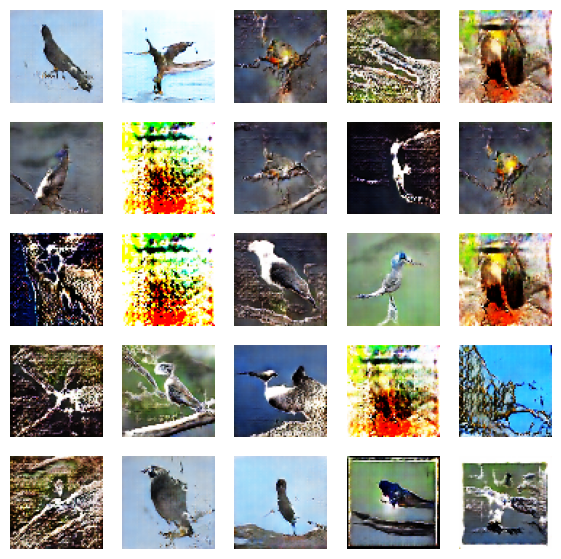

Saving checkpoint for epoch 291 at checkpoint/bert_batnorm/ckpt-30


Time for epoch 291 is 405.00088453292847 sec
Time for epoch 292 is 387.2040343284607 sec
Time for epoch 293 is 377.8446776866913 sec
Time for epoch 294 is 369.7258286476135 sec
Time for epoch 295 is 380.3954839706421 sec
Time for epoch 296 is 375.25976634025574 sec
Time for epoch 297 is 371.60413670539856 sec
Time for epoch 298 is 380.02480363845825 sec
Time for epoch 299 is 377.633469581604 sec
Time for epoch 300 is 371.02692794799805 sec
D_loss [2.44553232]
G_loss [4.34282637]
D_loss [2.35605407]
G_loss [4.98482513]
D_loss [2.46039867]
G_loss [5.28615093]
D_loss [2.18998766]
G_loss [6.44815636]
D_loss [2.44823503]
G_loss [4.90799665]
D_loss [2.20669866]
G_loss [5.44838476]
D_loss [2.41542435]
G_loss [4.79476213]
D_loss [2.24690771]
G_loss [5.59601974]
D_loss [2.25033808]
G_loss [5.18794584]
D_loss [2.52621484]
G_loss [5.07443237]
D_loss [2.27428389]
G_loss [5.52766037]
D_loss [2.62554836]
G_loss [5.29865646]
D_loss [2.47113657]
G_loss [4.96780968]
D_loss [2.19868612]
G_loss [4.877985

D_loss [2.32710791]
G_loss [4.57334328]
D_loss [2.3431685]
G_loss [5.24814701]
D_loss [2.46096849]
G_loss [4.61355686]
D_loss [2.44090843]
G_loss [5.34220171]
D_loss [2.35125208]
G_loss [4.97730541]
D_loss [2.43044925]
G_loss [4.22736931]
D_loss [2.31694365]
G_loss [4.87839842]
D_loss [2.4354167]
G_loss [4.79079819]
D_loss [2.30855036]
G_loss [4.48342562]
D_loss [2.43648529]
G_loss [5.15873241]
D_loss [2.37978196]
G_loss [5.63122702]
D_loss [2.28506708]
G_loss [5.94858646]
D_loss [2.27101946]
G_loss [5.39112234]
D_loss [2.30962038]
G_loss [5.28711605]
D_loss [2.48838186]
G_loss [5.27953386]
D_loss [2.31607389]
G_loss [5.19175148]
D_loss [2.36216187]
G_loss [5.12765408]
D_loss [2.29741645]
G_loss [4.45454311]
D_loss [2.48218918]
G_loss [5.24831915]
D_loss [2.35339689]
G_loss [5.00325298]
D_loss [2.36298418]
G_loss [5.55186462]
D_loss [2.47308636]
G_loss [6.06494427]
D_loss [2.54770184]
G_loss [4.99320173]
D_loss [2.41571093]
G_loss [4.52050304]
D_loss [2.62214971]
G_loss [5.01161957]
D_

D_loss [2.31908417]
G_loss [4.90817356]
D_loss [2.31938791]
G_loss [4.76916122]
D_loss [2.2670188]
G_loss [4.96369696]
D_loss [2.41996193]
G_loss [5.06209278]
D_loss [2.46396756]
G_loss [5.75829411]
D_loss [2.44421196]
G_loss [4.72247505]
D_loss [2.44714546]
G_loss [4.55075073]
D_loss [2.42425537]
G_loss [4.87873554]
D_loss [2.6015234]
G_loss [5.08652401]
D_loss [2.42834044]
G_loss [4.56352949]
D_loss [2.36320853]
G_loss [4.92527103]
D_loss [2.34300661]
G_loss [4.9072876]
D_loss [2.35989833]
G_loss [5.4607029]
D_loss [2.38066769]
G_loss [4.94560146]
D_loss [2.39276934]
G_loss [5.46332455]
D_loss [2.2271533]
G_loss [5.58969641]
D_loss [2.45506358]
G_loss [5.16708326]
D_loss [2.25708532]
G_loss [5.8855238]
D_loss [2.34296179]
G_loss [4.74190617]
D_loss [2.30935335]
G_loss [5.93726301]
D_loss [2.40792799]
G_loss [5.06344032]
D_loss [2.38974237]
G_loss [6.00997162]
D_loss [2.53616047]
G_loss [5.27892542]
D_loss [2.32275105]
G_loss [4.35478878]
D_loss [2.37707138]
G_loss [4.41426373]
D_loss

G_loss [5.23608589]
D_loss [2.50835848]
G_loss [4.92767382]
D_loss [2.43821144]
G_loss [5.06516457]
D_loss [2.365798]
G_loss [5.46545887]
D_loss [2.27549744]
G_loss [5.99064159]
D_loss [2.33899927]
G_loss [4.73970556]
D_loss [2.42098093]
G_loss [4.83746338]
D_loss [2.26169348]
G_loss [4.74140167]
D_loss [2.39204216]
G_loss [5.03381062]
D_loss [2.30698061]
G_loss [4.20283175]
D_loss [2.47225952]
G_loss [4.44808865]
D_loss [2.33008671]
G_loss [6.13794804]
D_loss [2.34980679]
G_loss [6.14829779]
D_loss [2.54566574]
G_loss [5.91433811]
D_loss [2.23121738]
G_loss [5.167665]
D_loss [2.29731655]
G_loss [4.91412258]
D_loss [2.3006568]
G_loss [5.01272488]
D_loss [2.44534826]
G_loss [5.2187705]
D_loss [2.5079627]
G_loss [5.96291447]
D_loss [2.43850732]
G_loss [4.54917717]
D_loss [2.39045691]
G_loss [3.89518642]
D_loss [2.26782084]
G_loss [4.95074511]
D_loss [2.18807173]
G_loss [5.14854336]
D_loss [2.49294472]
G_loss [4.90185261]
D_loss [2.57751799]
G_loss [5.37048912]
D_loss [2.40249634]
G_loss 

D_loss [2.30569625]
G_loss [4.85146809]
D_loss [2.17572594]
G_loss [5.27900505]
D_loss [2.39991736]
G_loss [4.86076164]
D_loss [2.25555444]
G_loss [5.62679863]
D_loss [2.30931902]
G_loss [5.15727329]
D_loss [2.35762596]
G_loss [5.21296263]
D_loss [2.43683839]
G_loss [5.601367]
D_loss [2.49677849]
G_loss [5.5092268]
D_loss [2.18931961]
G_loss [5.04342747]
D_loss [2.48515272]
G_loss [4.62491035]
D_loss [2.32792401]
G_loss [5.3829155]
D_loss [2.36711073]
G_loss [5.29873514]
D_loss [2.36456537]
G_loss [5.35068607]
D_loss [2.49865866]
G_loss [5.07354641]
D_loss [2.46939945]
G_loss [5.04516029]
D_loss [2.59165382]
G_loss [5.03414869]
D_loss [2.40150976]
G_loss [5.56016111]
D_loss [2.37092113]
G_loss [4.96202755]
D_loss [2.55423]
G_loss [4.741189]
D_loss [2.46132779]
G_loss [4.54924965]
D_loss [2.53382301]
G_loss [6.01895]
D_loss [2.33588362]
G_loss [5.73855686]
D_loss [2.40049887]
G_loss [5.48807383]
D_loss [2.30830503]
G_loss [5.11147833]
D_loss [2.33579302]
G_loss [4.9471674]
D_loss [2.418

D_loss [2.45629692]
G_loss [5.21149874]
D_loss [2.41725397]
G_loss [5.40102434]
D_loss [2.35017681]
G_loss [4.26601124]
D_loss [2.39761329]
G_loss [4.6867547]
D_loss [2.22928023]
G_loss [5.3996706]
D_loss [2.23454905]
G_loss [5.34948158]
D_loss [2.37185812]
G_loss [4.41877842]
D_loss [2.3220706]
G_loss [4.92187834]
D_loss [2.32980084]
G_loss [4.27493477]
D_loss [2.24059725]
G_loss [4.92103481]
D_loss [2.28971338]
G_loss [4.33028507]
D_loss [2.12776685]
G_loss [4.7461257]
D_loss [2.44097877]
G_loss [4.6728096]
D_loss [2.40294647]
G_loss [5.1914444]
D_loss [2.38508463]
G_loss [5.50425]
D_loss [2.28861141]
G_loss [5.40959883]
D_loss [2.42837071]
G_loss [5.49723053]
D_loss [2.27625132]
G_loss [5.26388216]
D_loss [2.35772109]
G_loss [5.43683863]
D_loss [2.33526254]
G_loss [5.19829]
D_loss [2.25611806]
G_loss [5.79630566]
D_loss [2.60029221]
G_loss [5.22785]
D_loss [2.46987581]
G_loss [5.58733368]
D_loss [2.34799242]
G_loss [4.82681656]
D_loss [2.17251539]
G_loss [4.90791893]
D_loss [2.54246

D_loss [2.49394178]
G_loss [5.58198786]
D_loss [2.52718544]
G_loss [5.50800419]
D_loss [2.45848012]
G_loss [5.73213]
D_loss [2.42835808]
G_loss [5.43598175]
D_loss [2.17030573]
G_loss [5.39799]
D_loss [2.45388556]
G_loss [5.45759296]
D_loss [2.39189863]
G_loss [6.11275673]
D_loss [2.2516613]
G_loss [4.68559647]
D_loss [2.33389235]
G_loss [4.59915924]
D_loss [2.48030519]
G_loss [4.791821]
D_loss [2.47330666]
G_loss [5.81118631]
D_loss [2.33156037]
G_loss [4.85024452]
D_loss [2.2795186]
G_loss [5.35837078]
D_loss [2.16414666]
G_loss [5.91546]
D_loss [2.16341639]
G_loss [4.76911163]
D_loss [2.49038529]
G_loss [4.59629726]
D_loss [2.44841266]
G_loss [4.53363371]
D_loss [2.39638209]
G_loss [4.32920408]
D_loss [2.40500069]
G_loss [6.18901348]
D_loss [2.19618559]
G_loss [5.94788742]
D_loss [2.42175555]
G_loss [5.50259209]
D_loss [2.31729198]
G_loss [4.62552261]
D_loss [2.14404631]
G_loss [4.37770224]
D_loss [2.68750525]
G_loss [4.17694187]
D_loss [2.29886389]
G_loss [4.71879911]
D_loss [2.529

G_loss [5.37504]
D_loss [2.54227543]
G_loss [5.68291187]
D_loss [2.40478873]
G_loss [5.64973354]
D_loss [2.40385771]
G_loss [4.71100807]
D_loss [2.49683094]
G_loss [4.35947323]
D_loss [2.41482902]
G_loss [5.06374311]
D_loss [2.42657614]
G_loss [4.45137882]
D_loss [2.22295308]
G_loss [4.88114738]
D_loss [2.26935387]
G_loss [4.97840357]
D_loss [2.40502739]
G_loss [5.21041441]
D_loss [2.20552063]
G_loss [4.63171864]
D_loss [2.4501276]
G_loss [5.23764038]
D_loss [2.24994349]
G_loss [5.00261]
D_loss [2.61845016]
G_loss [4.61244583]
D_loss [2.61281681]
G_loss [4.81545162]
D_loss [2.29295349]
G_loss [5.36944771]
D_loss [2.25562859]
G_loss [5.44942522]
D_loss [2.32401133]
G_loss [5.53288174]
D_loss [2.36180091]
G_loss [4.709548]
D_loss [2.33705473]
G_loss [4.64223862]
D_loss [2.39685965]
G_loss [4.39242268]
D_loss [2.43359137]
G_loss [5.54508]
D_loss [2.48674273]
G_loss [6.25658131]
D_loss [2.26234]
G_loss [3.96382284]
D_loss [2.38752389]
G_loss [5.34992838]
D_loss [2.55984592]
G_loss [4.84899

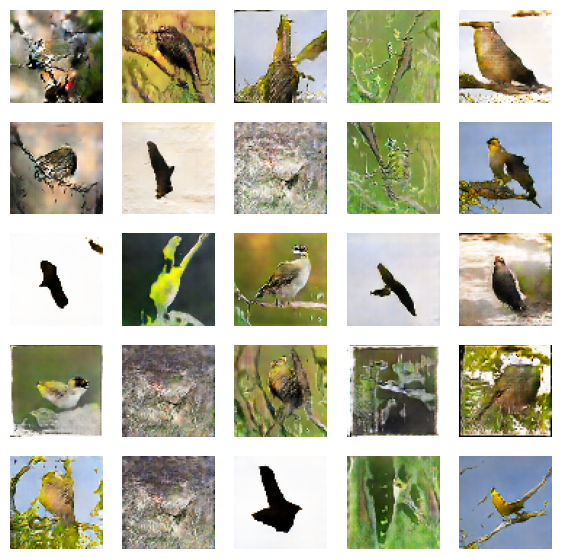

Saving checkpoint for epoch 301 at checkpoint/bert_batnorm/ckpt-31


Time for epoch 301 is 379.54273557662964 sec
Time for epoch 302 is 373.03357791900635 sec
Time for epoch 303 is 368.46131134033203 sec
Time for epoch 304 is 372.4901661872864 sec
Time for epoch 305 is 375.2763466835022 sec
Time for epoch 306 is 437.9241843223572 sec
Time for epoch 307 is 371.0107066631317 sec
Time for epoch 308 is 367.33030819892883 sec
Time for epoch 309 is 385.44545316696167 sec
Time for epoch 310 is 395.7778971195221 sec
D_loss [2.4321034]
G_loss [5.51704502]
D_loss [2.35795355]
G_loss [5.16177177]
D_loss [2.50976467]
G_loss [5.56498432]
D_loss [2.36861777]
G_loss [5.57471943]
D_loss [2.17022943]
G_loss [4.59121561]
D_loss [2.18867588]
G_loss [4.46794224]
D_loss [2.33762193]
G_loss [3.99307251]
D_loss [2.58700562]
G_loss [4.5595932]
D_loss [2.2839222]
G_loss [4.7520237]
D_loss [2.38893938]
G_loss [6.31810474]
D_loss [2.43902302]
G_loss [4.80056286]
D_loss [2.55786252]
G_loss [4.6806612]
D_loss [2.30175924]
G_loss [5.03310394]
D_loss [2.37677479]
G_loss [5.02230787]


D_loss [2.35765648]
G_loss [4.55237532]
D_loss [2.11965966]
G_loss [5.50866604]
D_loss [2.40080643]
G_loss [5.27483368]
D_loss [2.26757336]
G_loss [4.60233927]
D_loss [2.27924395]
G_loss [5.83475]
D_loss [2.27009535]
G_loss [5.8571105]
D_loss [2.18790627]
G_loss [4.7803]
D_loss [2.38222361]
G_loss [6.23088074]
D_loss [2.41940331]
G_loss [4.32593584]
D_loss [2.20539904]
G_loss [5.2104311]
D_loss [2.46618366]
G_loss [4.97344589]
D_loss [2.36861753]
G_loss [5.19528]
D_loss [2.39096379]
G_loss [5.09341288]
D_loss [2.24573827]
G_loss [4.58424664]
D_loss [2.18717265]
G_loss [4.84118319]
D_loss [2.25797367]
G_loss [4.65316105]
D_loss [2.33708239]
G_loss [4.68073511]
D_loss [2.46116471]
G_loss [5.09221268]
D_loss [2.24112892]
G_loss [5.90570831]
D_loss [2.45197773]
G_loss [6.91411686]
D_loss [2.30249453]
G_loss [4.54236078]
D_loss [2.43006]
G_loss [4.90620232]
D_loss [2.63606167]
G_loss [4.4558897]
D_loss [2.53696036]
G_loss [5.45418358]
D_loss [2.33799267]
G_loss [5.58740807]
D_loss [2.416841

D_loss [2.33888102]
G_loss [5.20769787]
D_loss [2.27225208]
G_loss [4.40558815]
D_loss [2.30392027]
G_loss [5.24499512]
D_loss [2.53707314]
G_loss [4.712924]
D_loss [2.34883595]
G_loss [4.50955963]
D_loss [2.27629757]
G_loss [5.01067638]
D_loss [2.39606762]
G_loss [5.34675264]
D_loss [2.30410767]
G_loss [4.94947481]
D_loss [2.31666]
G_loss [4.93778133]
D_loss [2.47740936]
G_loss [5.36461735]
D_loss [2.48135948]
G_loss [4.97383404]
D_loss [2.309582]
G_loss [4.85762501]
D_loss [2.34900951]
G_loss [5.03699255]
D_loss [2.42263484]
G_loss [5.75794601]
D_loss [2.28948355]
G_loss [5.07179308]
D_loss [2.4486742]
G_loss [4.48658514]
D_loss [2.41055202]
G_loss [5.09386349]
D_loss [2.28104639]
G_loss [5.86669]
D_loss [2.41267872]
G_loss [5.7926569]
D_loss [2.27223015]
G_loss [5.7510891]
D_loss [2.40582705]
G_loss [4.96844339]
D_loss [2.36930561]
G_loss [5.54168177]
D_loss [2.49137163]
G_loss [5.49783182]
D_loss [2.3645575]
G_loss [5.34984112]
D_loss [2.36930776]
G_loss [4.93299294]
D_loss [2.2648

G_loss [5.39081812]
D_loss [2.46808815]
G_loss [5.68431282]
D_loss [2.50135565]
G_loss [4.88652134]
D_loss [2.30063701]
G_loss [4.81083393]
D_loss [2.31483364]
G_loss [5.32442188]
D_loss [2.38426375]
G_loss [4.94779587]
D_loss [2.23398185]
G_loss [5.13260841]
D_loss [2.20241833]
G_loss [5.08714867]
D_loss [2.42323875]
G_loss [5.36625051]
D_loss [2.34404588]
G_loss [5.78258085]
D_loss [2.47340369]
G_loss [4.98125267]
D_loss [2.3134439]
G_loss [4.88454056]
D_loss [2.32252979]
G_loss [5.02868462]
D_loss [2.38021612]
G_loss [4.63221836]
D_loss [2.34327]
G_loss [4.72174358]
D_loss [2.27180243]
G_loss [5.58606529]
D_loss [2.61963511]
G_loss [5.2770071]
D_loss [2.19747281]
G_loss [5.4020462]
D_loss [2.42480135]
G_loss [5.82334089]
D_loss [2.35808349]
G_loss [4.8384428]
D_loss [2.29944563]
G_loss [4.70900822]
D_loss [2.28114653]
G_loss [5.69457865]
D_loss [2.41887569]
G_loss [5.02043152]
D_loss [2.20081687]
G_loss [5.83604765]
D_loss [2.43317938]
G_loss [6.51754713]
D_loss [2.34033489]
G_loss 

G_loss [4.739851]
D_loss [2.33666134]
G_loss [5.45995712]
D_loss [2.38233185]
G_loss [5.69329834]
D_loss [2.44155169]
G_loss [5.67865133]
D_loss [2.21025038]
G_loss [5.24526787]
D_loss [2.26505804]
G_loss [5.43488884]
D_loss [2.42314386]
G_loss [5.00845623]
D_loss [2.45926094]
G_loss [4.54800224]
D_loss [2.23994136]
G_loss [4.16451931]
D_loss [2.37463617]
G_loss [5.09939289]
D_loss [2.3583169]
G_loss [4.39343405]
D_loss [2.33237934]
G_loss [5.44851971]
D_loss [2.4025178]
G_loss [4.32552195]
D_loss [2.26159978]
G_loss [5.30539846]
D_loss [2.15771437]
G_loss [4.92413521]
D_loss [2.31611609]
G_loss [5.07913876]
D_loss [2.41121435]
G_loss [4.9254837]
D_loss [2.43914747]
G_loss [5.05368519]
D_loss [2.17309737]
G_loss [4.85697031]
D_loss [2.41251278]
G_loss [5.64437437]
D_loss [2.38344812]
G_loss [4.58128548]
D_loss [2.59305954]
G_loss [5.23234177]
D_loss [2.32486391]
G_loss [5.64779854]
D_loss [2.26965904]
G_loss [4.94438457]
D_loss [2.55249548]
G_loss [5.54987621]
D_loss [2.64057255]
G_los

G_loss [4.55434513]
D_loss [2.27472496]
G_loss [4.57949162]
D_loss [2.4414947]
G_loss [5.19863319]
D_loss [2.52161407]
G_loss [5.03999805]
D_loss [2.42105746]
G_loss [5.21704865]
D_loss [2.3079164]
G_loss [5.05425]
D_loss [2.38153982]
G_loss [5.21948147]
D_loss [2.39113474]
G_loss [5.40750885]
D_loss [2.43967867]
G_loss [3.82311344]
D_loss [2.39271092]
G_loss [5.01030636]
D_loss [2.31557393]
G_loss [4.89166641]
D_loss [2.14501834]
G_loss [4.71182775]
D_loss [2.44116712]
G_loss [5.07417297]
D_loss [2.47672892]
G_loss [4.92608833]
D_loss [2.41148496]
G_loss [5.106637]
D_loss [2.42579269]
G_loss [4.97102547]
D_loss [2.45351577]
G_loss [4.51958561]
D_loss [2.45925403]
G_loss [5.24748087]
D_loss [2.32060623]
G_loss [5.17791]
D_loss [2.21790767]
G_loss [4.85296583]
D_loss [2.31258965]
G_loss [5.06736851]
D_loss [2.61498785]
G_loss [4.79662132]
D_loss [2.63703227]
G_loss [4.94169235]
D_loss [2.51743221]
G_loss [5.6596303]
D_loss [2.3740592]
G_loss [5.31123161]
D_loss [2.48709941]
G_loss [4.99

G_loss [4.91919518]
D_loss [2.38233423]
G_loss [5.13846588]
D_loss [2.35980034]
G_loss [4.91273308]
D_loss [2.46038246]
G_loss [5.50455618]
D_loss [2.31037426]
G_loss [5.05699444]
D_loss [2.35896325]
G_loss [5.60862255]
D_loss [2.31172943]
G_loss [5.33258724]
D_loss [2.22828865]
G_loss [5.10774374]
D_loss [2.50671721]
G_loss [5.79007244]
D_loss [2.29602456]
G_loss [5.53758764]
D_loss [2.52302241]
G_loss [5.70761]
D_loss [2.22013283]
G_loss [5.08655405]
D_loss [2.31729269]
G_loss [4.68410873]
D_loss [2.25509787]
G_loss [5.29996204]
D_loss [2.36944127]
G_loss [4.78246832]
D_loss [2.37111521]
G_loss [5.11079025]
D_loss [2.56287026]
G_loss [5.39913559]
D_loss [2.37007475]
G_loss [4.50118732]
D_loss [2.49176264]
G_loss [4.51909161]
D_loss [2.39662743]
G_loss [5.84727621]
D_loss [2.23112607]
G_loss [6.81784153]
D_loss [2.59965944]
G_loss [5.2325592]
D_loss [2.38267136]
G_loss [5.32072735]
D_loss [2.48560381]
G_loss [4.54538155]
D_loss [2.35148764]
G_loss [4.95797205]
D_loss [2.41032076]
G_lo

D_loss [2.37701368]
G_loss [5.35098934]
D_loss [2.36237478]
G_loss [5.37962389]
D_loss [2.48975611]
G_loss [5.12681532]
D_loss [2.41294909]
G_loss [5.21582603]
D_loss [2.35324621]
G_loss [4.97893286]
D_loss [2.30002809]
G_loss [5.95712376]
D_loss [2.56038737]
G_loss [4.85879564]
D_loss [2.38863039]
G_loss [4.23463821]
D_loss [2.28262615]
G_loss [5.86627579]
D_loss [2.38558912]
G_loss [4.6611805]
D_loss [2.46022797]
G_loss [4.7128458]
D_loss [2.39760208]
G_loss [4.24745512]
D_loss [2.34407902]
G_loss [4.3641181]
D_loss [2.39553404]
G_loss [5.05928612]
D_loss [2.4002471]
G_loss [6.12748909]
D_loss [2.24788404]
G_loss [4.9791503]
D_loss [2.44547892]
G_loss [5.600214]
D_loss [2.36702251]
G_loss [5.11381102]
D_loss [2.37807155]
G_loss [5.73857]
D_loss [2.5052948]
G_loss [5.68155956]
D_loss [2.11267328]
G_loss [5.89168]
D_loss [2.44525766]
G_loss [5.02539301]
D_loss [2.38467741]
G_loss [5.29597521]
D_loss [2.45410824]
G_loss [5.92135954]
D_loss [2.5967865]
G_loss [5.35539818]
D_loss [2.25137

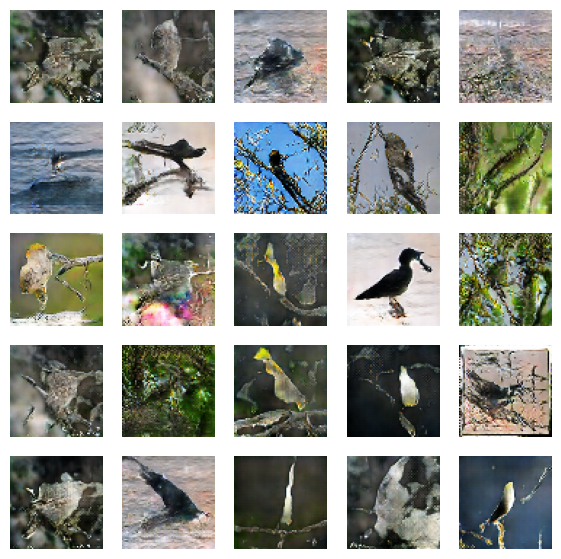

Saving checkpoint for epoch 311 at checkpoint/bert_batnorm/ckpt-32


Time for epoch 311 is 400.85462069511414 sec
Time for epoch 312 is 396.28904604911804 sec


KeyboardInterrupt: 

In [36]:
ms_loss_weight = 1.0
import tensorflow as tf
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.000035, beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.000035, beta_1 = 0.5)

discriminator = define_discriminator()
generator = define_generator()

images, lbs = load_data()
BUFFER_SIZE = images.shape[0]
n_batch = 8

train_dataset = tf.data.Dataset.from_tensor_slices((images,lbs)).shuffle(BUFFER_SIZE).batch(n_batch)

train(train_dataset,n_batch,start=312)

[ 6971  1169   785  6244 11072  1029  4066  5519  1216]
0 Field_Sparrow_0090_113613.jpg
1 Eastern_Towhee_0111_22168.jpg
2 Lazuli_Bunting_0008_15195.jpg
3 Common_Raven_0028_102452.jpg
4 Pileated_Woodpecker_0030_180208.jpg
5 Gray_Catbird_0063_20707.jpg
6 Green_Violetear_0066_795682.jpg
7 White_Breasted_Nuthatch_0113_86057.jpg
8 Chuck_Will_Widow_0038_796989.jpg
(9, 64, 64, 3)


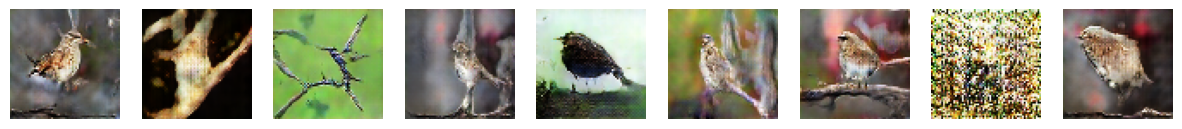

In [37]:
#
from keras.preprocessing.image import array_to_img

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy import asarray
import numpy as np

import os
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from numpy.random import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from numpy.random import randn
from numpy.random import randint
import time
import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import linspace
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

from numpy.random import randint
import numpy as np

def create_sent_vector(sent):
    sent = [sent]
    text_preprocessed = bert_preprocess_model(sent)
    final = bert_model(text_preprocessed)
    return final['pooled_output'].numpy()
    #result_array = np.empty((0, 300))

  #for word in word_tokenize(sent):
    #result_array = np.append(result_array, [model[word]], axis=0)
  #final = np.mean(result_array, axis=0).astype('float32')
  #return final

def generate_random_word_vectors_from_dataset(n_samples, create_new_captions = False):

  if create_new_captions:
      e = create_sent_vector('This bird has  white breast with brown feathers')
      f = create_sent_vector('This bird has  white breast with blue feathers')
      v = []
      #e.reshape(1,768)
      print(e.shape)
      flag = False
      for i in range(n_samples):
        
        if not flag:
          v.append(f)
          flag = True
        elif flag:
          v.append(e)
          flag = False
      return np.asarray(v), np.asarray([])
  else:
    ix = randint(0,len(captions), n_samples)
    print(ix)
    return  np.asarray(captions)[ix], np.asarray(labels)[ix]

def generate_images(model, test_input):

  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[15, 15])
  for i in range(predictions.shape[0]):
      pyplot.subplot(1, 9, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.show()

# Credit to: https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/
def interpolate_points(p1, p2, n_steps=9):
	ratios = linspace(0, 1, num=n_steps)
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)
 
def generate_latent_points(latent_dim, n_samples, interpolate = False):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions, labels = generate_random_word_vectors_from_dataset(n_samples, create_new_captions=False)
    if interpolate:
      text_captions = interpolate_points(text_captions[0], text_captions[1])
      x_input = interpolate_points(x_input[0], x_input[1])
    for index, s in enumerate(labels.flat):
      print(index, s)

    return [x_input, text_captions]

#gen_model = tf.keras.models.load_model('/content/drive/My Drive/146stage_new_gan_animal_model_120.h5')

for i in range(1):
  generate_images(generator, generate_latent_points(100, 9))
pyplot.show()

In [38]:
def get_index_by_label(label):
  for idx, l in enumerate(labels):
    if l in label:
      return idx


print(get_index_by_label('Western_Wood_Pewee_0061_795060.jpg'))

5987


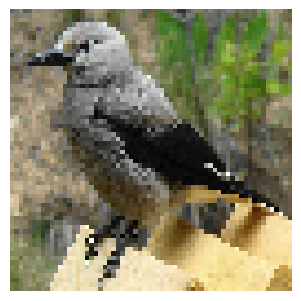

In [39]:
# Show image in image embeddings

pyplot.figure(figsize=[8, 8])

pyplot.subplot(1, 2, 0+1)
pyplot.imshow(array_to_img(image_embeddings[5432]))
pyplot.axis('off')
pyplot.show()

In [40]:
import tensorflow as tf
#gen_model = tf.keras.models.load_model('models/46stage_new_gan_animal_model_781.h5')

In [41]:
import numpy as np
def get_random_word_vectors_from_dataset(n_samples,captions):
    ix = np.random.randint(0, len(captions), n_samples)
    return np.asarray(captions)[ix]

In [42]:
def de7ko(cap):
    f = create_sent_vector(cap)
    v = []
    flag = False
    for i in range(1):    
        v.append(f)
        flag = True
    return np.asarray(v), np.asarray([])

In [43]:
noise = tf.random.normal((1,100))

In [44]:
caption = create_sent_vector('This bird is blue')

In [45]:
print(noise.shape)

(1, 100)


In [186]:
noise = tf.random.normal((1,100))

In [187]:
predictions = generator([noise,cap], training=False)

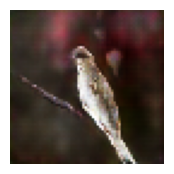

In [189]:
pyplot.figure(figsize=[2, 2])

pyplot.imshow(array_to_img(predictions.numpy()[0]))
pyplot.axis('off')
pyplot.show()

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
import string

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS

all_stopwords_gensim = STOPWORDS.union(set(['a']))

In [ ]:
def make_prediction(cap):
    text = cap
    cap = remove_stopwords(text)
    cap = cap.translate(str.maketrans('','', string.punctuation))
    noise = tf.random.normal((1,100))
    
    caption, _ = de7ko(cap)
    predictions = generator([noise,caption], training=False)
    pyplot.figure(figsize=[5, 5])
    pyplot.imshow(array_to_img(predictions.numpy()[0]))
    pyplot.axis('off')

In [191]:
def make_prediction_grid(cap):
    pyplot.figure(figsize=[10, 10])

    for i in range(20):
        text = cap
        #cap = remove_stopwords(text)
        #cap = cap.translate(str.maketrans('','', string.punctuation))
        noise = tf.random.normal((1,100))
    
        #caption, _ = de7ko(cap)
        predictions = generator([noise,cap], training=False)
    
        pyplot.subplot(5, 5, i+1)
        pyplot.imshow(array_to_img(predictions.numpy()[0]))
        pyplot.axis('off')
    pyplot.show()

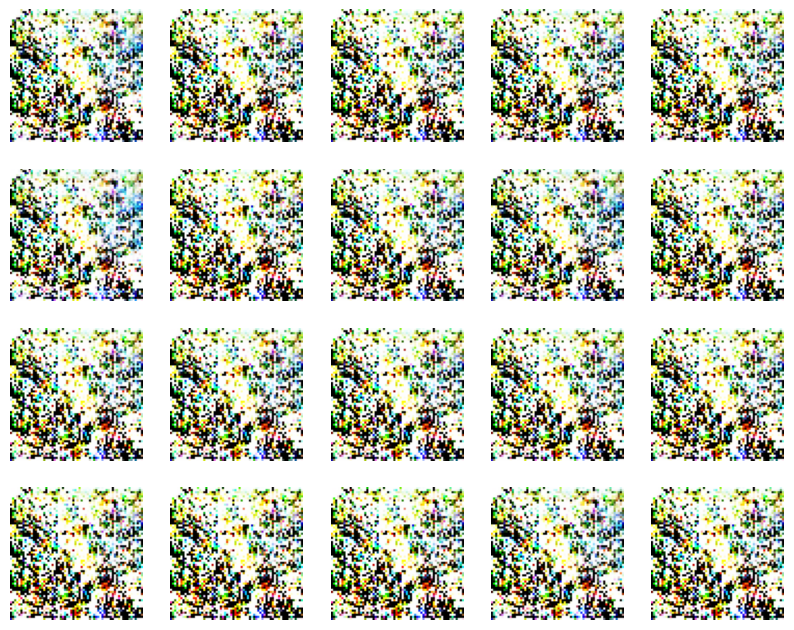

In [207]:
test = test.reshape(1,768)
make_prediction_grid(test)

In [100]:
noise, cap = generate_latent_points(100,1)

[5395]
0 Nighthawk_0067_795335.jpg


In [101]:
tst = []
for i in caps[0]:
    i = abs(i)
    tst.append(str(i))

In [102]:
mx = max(len(x) for x in tst)

In [103]:
mx

13

In [67]:
cap[0]

array([-0.84165835, -0.23930179,  0.6231534 ,  0.6602766 , -0.46241483,
       -0.15175055,  0.888082  ,  0.20358424,  0.32461226, -0.9996119 ,
        0.24187844,  0.04020188,  0.9663142 , -0.29472393,  0.90732473,
       -0.4423041 , -0.1641165 , -0.49753782,  0.44229317, -0.762188  ,
        0.55699563,  0.7325509 ,  0.5788818 ,  0.20815493,  0.35077873,
       -0.0027111 , -0.48799455,  0.90745395,  0.92626405,  0.6596867 ,
       -0.7200769 ,  0.19633466, -0.9703507 , -0.192492  ,  0.5152828 ,
       -0.9593991 ,  0.14719892, -0.734002  , -0.10241876, -0.02667212,
       -0.8566229 ,  0.25878796,  0.99099773, -0.12284554,  0.05387786,
       -0.34344435, -0.9993382 ,  0.20666163, -0.8087448 , -0.54875994,
       -0.4226896 , -0.71468323,  0.1897191 ,  0.33011702,  0.35424098,
        0.34740627, -0.07789008,  0.1667105 , -0.09057609, -0.5284599 ,
       -0.5685321 ,  0.27329615,  0.19539618, -0.8489316 , -0.4310597 ,
       -0.5875956 , -0.15219477, -0.22767109, -0.00309847,  0.05

In [60]:
caps = create_sent_vector('this a small bird with fluffy grey feathers and a grey beak.')

In [198]:
len(test)

768

In [206]:
test = []
test = np.array([-8.80453765e-01, -2.30016977e-01,  1.53982677e-02,  7.63145745e-01,
       -1.67636186e-01, -1.12899035e-01,  9.20433581e-01,  2.31789663e-01,
       -1.92173526e-01, -9.99809325e-01, -1.48938507e-01,  5.04856467e-01,
        9.74133551e-01,  2.51672100e-02,  9.12574768e-01, -6.27402663e-01,
       -3.41317058e-01, -5.57229817e-01,  3.86493057e-01, -8.32161784e-01,
        5.95441282e-01,  8.90097916e-01,  4.09509450e-01,  2.50163227e-01,
        3.93467665e-01,  5.93674242e-01, -6.57673061e-01,  9.15036798e-01,
        9.51860309e-01,  7.05915213e-01, -7.49266684e-01,  1.42062679e-01,
       -9.77758586e-01, -2.60669142e-01, -1.55464560e-01, -9.79721069e-01,
        1.93323925e-01, -7.69981802e-01, -9.83245596e-02,  2.95864381e-02,
       -8.72071326e-01,  2.98111081e-01,  9.95922685e-01,  2.26048753e-01,
        9.48943347e-02, -3.52533966e-01, -9.99241948e-01,  2.67680496e-01,
       -8.80547166e-01,  2.29656994e-01,  1.56744406e-01, -3.83794233e-02,
        1.54842883e-01,  4.10892785e-01,  4.32878345e-01,  2.77051806e-01,
       -1.26063168e-01,  1.05151318e-01, -1.20240554e-01, -5.75469494e-01,
       -5.82406163e-01,  3.11504900e-01, -2.16019571e-01, -8.77511382e-01,
        1.88881099e-01, -1.96082413e-01, -9.12517831e-02, -1.99827895e-01,
        7.07085105e-03, -5.99269308e-02,  8.59454513e-01,  1.55581653e-01,
        2.55471617e-01, -7.69784927e-01, -8.00335184e-02,  1.71866283e-01,
       -6.24659777e-01,  9.99961853e-01, -5.86809397e-01, -9.69742000e-01,
       -5.30491509e-02,  3.83228483e-03,  5.26301026e-01,  3.91498595e-01,
       -2.09871814e-01, -9.99847651e-01,  4.50981826e-01, -9.65828672e-02,
       -9.84176159e-01,  1.81323260e-01,  3.74678403e-01, -2.23348811e-01,
       -2.78360933e-01,  4.80318844e-01, -3.10938448e-01, -2.59735644e-01,
       -3.37920517e-01,  8.21603171e-04, -2.34830663e-01, -1.45366967e-01,
        8.19220021e-02, -1.97157651e-01, -6.95125610e-02, -3.61513615e-01,
        2.15650231e-01, -3.76727879e-01, -4.95858014e-01,  2.90638179e-01,
       -2.61082619e-01,  6.50961041e-01,  4.02054161e-01, -2.60238439e-01,
        3.67120296e-01, -9.51097190e-01,  5.91515958e-01, -1.98343113e-01,
       -9.71337318e-01, -5.65517545e-01, -9.80491877e-01,  7.09538043e-01,
       -1.49333894e-01, -1.58831924e-01,  9.45483029e-01,  2.92326093e-01,
        2.65603542e-01, -5.56376502e-02, -1.24673292e-01, -9.99982238e-01,
       -4.98333573e-01, -3.81835163e-01,  1.58755630e-01, -1.43947557e-01,
       -9.65010941e-01, -9.38152313e-01,  5.70341170e-01,  9.40006912e-01,
        1.62885293e-01,  9.92381215e-01, -2.85812289e-01,  9.12721992e-01,
       -1.74228549e-02, -3.11304063e-01, -8.08087736e-02, -3.95101398e-01,
        4.81125981e-01,  5.60868144e-01, -7.57838190e-01,  2.26778656e-01,
       -9.34472904e-02,  3.15034948e-02, -1.74440235e-01, -2.80600965e-01,
       -4.31810282e-02, -9.16801214e-01, -4.28465188e-01,  9.33690965e-01,
        1.69587761e-01, -1.29056215e-01,  5.24189889e-01, -2.63950288e-01,
       -4.53741968e-01,  8.22614193e-01,  4.66421396e-01,  3.39254558e-01,
       -8.45761150e-02,  3.94497246e-01,  3.92881036e-02,  4.73652571e-01,
       -8.50350320e-01,  1.59737349e-01,  3.63531709e-01, -2.73319781e-01,
       -9.77459271e-03, -9.66823697e-01, -3.28776777e-01,  4.89139616e-01,
        9.82344329e-01,  7.43519425e-01,  1.67659357e-01,  2.87553787e-01,
       -1.98833376e-01,  3.36682081e-01, -9.23790514e-01,  9.62900639e-01,
       -2.52083212e-01,  1.93947464e-01,  4.74669129e-01, -1.57359019e-01,
       -8.80155325e-01, -2.85705864e-01,  8.50389242e-01, -1.75189227e-01,
       -8.44866455e-01, -4.01739515e-02, -4.83462155e-01, -3.62090886e-01,
       -5.19712195e-02,  6.22924566e-01, -1.95959553e-01, -3.72283012e-01,
       -9.64309052e-02,  8.78189862e-01,  9.69230950e-01,  7.94695258e-01,
       -2.17274353e-01,  5.83401918e-01, -8.97849441e-01, -4.99798775e-01,
        1.34419411e-01,  2.60206789e-01,  1.61342382e-01,  9.89440918e-01,
       -3.33645530e-02, -1.43169940e-01, -9.05669749e-01, -9.77330387e-01,
        5.21452911e-02, -8.86295915e-01, -5.84830940e-02, -6.78180814e-01,
        3.56054783e-01,  6.64208710e-01,  4.78770360e-02,  3.81819487e-01,
       -9.83062446e-01, -7.61405647e-01,  2.95404553e-01, -3.38265955e-01,
        3.48766744e-01, -1.97353199e-01,  1.09244935e-01,  3.06839556e-01,
       -5.88864446e-01,  8.29047263e-01,  8.68932068e-01,  1.71525925e-01,
       -7.35009491e-01,  8.51148307e-01, -3.25095803e-01,  8.66294026e-01,
       -6.01488590e-01,  9.66577828e-01,  3.54924738e-01,  6.39811277e-01,
       -9.21796322e-01,  1.57003462e-01, -9.12463844e-01, -7.16707259e-02,
       -1.70224771e-01, -4.98019695e-01,  1.44815519e-01,  5.67531586e-01,
        2.87521541e-01,  6.14224195e-01, -5.64075232e-01,  9.94957328e-01,
       -6.29881099e-02, -9.34747159e-01,  5.54220200e-01, -2.11754054e-01,
       -9.77951109e-01,  2.71397412e-01,  2.88977623e-01, -3.89038742e-01,
       -3.91004741e-01, -3.56953144e-01, -9.30561066e-01,  9.18217123e-01,
        1.28633559e-01,  9.86722648e-01,  2.00015992e-01, -9.36000824e-01,
       -3.92773002e-01, -8.75337780e-01, -1.06749311e-01, -7.13189319e-02,
        3.57307464e-01, -1.67331904e-01, -9.38466966e-01,  4.40262258e-01,
        5.06743670e-01,  4.01247531e-01,  2.14894488e-01,  9.93849218e-01,
        9.91616964e-01,  9.65101063e-01,  8.59126866e-01,  8.83121252e-01,
       -8.06268036e-01,  2.92547524e-01,  9.99889493e-01, -6.24044478e-01,
       -9.99511600e-01, -9.25504804e-01, -6.13347590e-01,  4.61226195e-01,
       -9.99978721e-01, -4.35862578e-02, -5.63575774e-02, -9.03630733e-01,
       -1.23193599e-02,  9.65929747e-01,  9.85314488e-01, -9.99925315e-01,
        8.18023086e-01,  9.34401751e-01, -6.25441492e-01,  4.33474094e-01,
       -1.15517735e-01,  9.60539162e-01,  4.20662582e-01,  2.10319638e-01,
       -1.94298044e-01,  2.61679113e-01, -2.90394723e-01, -8.57349575e-01,
        3.76219042e-02,  1.55106738e-01,  5.88076830e-01,  2.07368523e-01,
       -7.28735924e-01, -8.98608923e-01, -2.51970261e-01, -1.01329803e-01,
       -2.15276599e-01, -9.38434422e-01, -1.67465955e-01, -1.88226134e-01,
        7.15597451e-01,  9.98114645e-02,  2.45786130e-01, -7.47976780e-01,
        1.92577228e-01, -3.39228004e-01,  4.36852425e-01,  6.28403664e-01,
       -8.97152483e-01, -7.05661297e-01, -5.60296357e-01, -3.01484793e-01,
        9.85715091e-02, -9.29942667e-01,  9.63285446e-01, -2.89033115e-01,
        2.71024317e-01,  9.99940097e-01, -2.87726194e-01, -8.66553664e-01,
        3.68165404e-01,  2.35099897e-01, -3.89547825e-01,  9.99905884e-01,
        5.68111420e-01, -9.65960324e-01, -5.37417591e-01,  2.14174345e-01,
       -3.69943380e-01, -4.46400106e-01,  9.96882021e-01, -1.75380498e-01,
        3.96185033e-02,  2.15842038e-01,  9.57530499e-01, -9.80891228e-01,
        4.69241440e-01, -9.00335252e-01, -9.46272433e-01,  9.42983091e-01,
        9.25438702e-01, -2.12100297e-01, -6.29902184e-01,  7.66361281e-02,
       -2.10510582e-01,  2.49523237e-01, -9.47067678e-01,  6.87735081e-01,
        5.29013634e-01, -1.82782546e-01,  8.92122090e-01, -9.10025537e-01,
       -5.06010354e-01,  3.63316894e-01, -1.09232731e-01,  2.65939206e-01,
        2.42671907e-01,  4.59666908e-01, -3.23862642e-01,  6.19740076e-02,
       -2.11146951e-01,  1.93632647e-01, -9.56532419e-01,  2.12749362e-01,
        9.99873579e-01,  1.31009445e-01, -2.07210526e-01, -1.89908087e-01,
       -7.35443085e-02, -2.63732821e-01,  2.73128897e-01,  4.32980269e-01,
       -2.25038186e-01, -7.89038599e-01,  4.99954112e-02, -9.32942390e-01,
       -9.73070741e-01,  7.63639569e-01,  1.87113822e-01, -3.09123665e-01,
        9.96837556e-01,  3.05217206e-01,  1.98344052e-01, -1.22368887e-01,
        4.71835315e-01, -1.49252638e-02,  5.69303453e-01, -1.74877137e-01,
        9.61008668e-01, -2.57232845e-01,  5.34489751e-01,  8.43871593e-01,
       -1.16998672e-01, -3.26318592e-01, -6.18683279e-01,  4.58297320e-02,
       -8.90101075e-01, -8.33739787e-02, -9.42334473e-01,  9.50139284e-01,
        4.93264906e-02,  3.24228555e-01,  1.96017206e-01,  9.70596820e-02,
        9.99930620e-01,  3.66374999e-01,  6.45800948e-01, -7.47105300e-01,
        8.90407145e-01, -7.44303763e-01, -7.42500603e-01, -3.09464961e-01,
       -2.08001584e-02, -5.59380976e-03, -2.29554608e-01,  3.11805397e-01,
       -9.66267705e-01,  5.95647022e-02,  2.00326554e-02, -9.74688530e-01,
       -9.84825373e-01,  2.79958844e-01,  7.92584121e-01,  6.14665635e-02,
       -4.73468482e-01, -6.69615269e-01, -5.50240636e-01,  2.80475497e-01,
       -2.22083390e-01, -9.09992814e-01,  3.85517538e-01, -2.18076855e-01,
        5.21199286e-01, -2.35613927e-01,  5.27731359e-01, -9.42211077e-02,
        7.29738057e-01,  4.48837370e-01,  1.50048375e-01, -7.33408034e-02,
       -8.19662750e-01,  8.19707870e-01, -8.41715693e-01, -1.54426724e-01,
       -1.78749129e-01,  9.99975026e-01, -3.81884128e-01,  2.72284001e-01,
        7.30699599e-01,  7.00210214e-01, -1.46290243e-01,  1.99640587e-01,
        2.05114216e-01,  2.06912100e-01,  1.00090228e-01,  8.23383629e-02,
       -8.65192056e-01, -3.20807785e-01,  4.90280867e-01, -2.96179444e-01,
       -1.64008841e-01,  7.83830106e-01,  1.35429958e-02,  1.31176114e-01,
        4.64188419e-02,  1.48278370e-01,  9.98232186e-01, -2.34221742e-01,
       -7.45560676e-02, -5.66452086e-01, -6.33716881e-02, -2.60931760e-01,
       -7.15886235e-01,  9.99623895e-01,  3.24440211e-01, -1.37580052e-01,
       -9.81491208e-01, -6.80922717e-02, -9.14913177e-01,  9.81398284e-01,
        7.72460043e-01, -8.50191236e-01,  4.97678101e-01,  4.87879574e-01,
       -1.21589467e-01,  8.09250772e-01, -2.32000455e-01, -2.31448591e-01,
        6.61229417e-02,  1.42842367e-01,  9.40303802e-01, -4.58441556e-01,
       -9.51286316e-01, -5.73005080e-01,  3.57860029e-01, -9.35118794e-01,
        8.09217632e-01, -5.25421321e-01, -2.04097047e-01, -2.24277765e-01,
        3.01374257e-01,  8.83164704e-01,  9.79141798e-04, -9.64358449e-01,
       -1.50636300e-01,  2.68379785e-02,  9.58737195e-01,  2.08762795e-01,
       -5.48031032e-01, -9.07494605e-01,  5.12077920e-02,  2.67167002e-01,
        4.13111039e-02, -9.11459029e-01,  9.51420367e-01, -9.75990355e-01,
        4.41281319e-01,  9.99710321e-01,  3.27615529e-01, -3.20269793e-01,
        2.63846397e-01, -5.04201055e-01,  1.81749582e-01, -3.26382294e-02,
        5.91295779e-01, -9.36210454e-01, -2.51662672e-01, -1.50325686e-01,
        2.69483179e-01, -2.11471453e-01,  3.76247942e-01,  6.07654274e-01,
        1.54238224e-01, -5.12871802e-01, -5.40481269e-01, -1.29259616e-01,
        3.58465165e-01,  7.96124995e-01, -2.40997508e-01, -2.07180575e-01,
        1.55750290e-01, -1.75655827e-01, -8.90735269e-01, -2.09824160e-01,
       -2.80681968e-01, -9.39359665e-01,  6.33977294e-01, -9.99955714e-01,
       -1.73266545e-01, -3.48771453e-01, -2.24385709e-01,  7.88768709e-01,
       -1.77228540e-01, -7.27730617e-02, -6.98809505e-01,  2.56371815e-02,
        7.01412201e-01,  7.18198836e-01, -2.75954813e-01, -1.80623353e-01,
       -7.42104530e-01,  2.32816353e-01, -1.13577075e-01,  1.72238290e-01,
       -1.36176959e-01,  6.97673619e-01, -1.46991074e-01,  9.99978900e-01,
        9.71630067e-02, -5.48564017e-01, -9.68859196e-01,  2.92616487e-01,
       -3.06941569e-01,  9.94913995e-01, -9.16791737e-01, -9.30493832e-01,
        2.88737655e-01, -4.94466901e-01, -7.91192114e-01,  1.90008670e-01,
        9.14912485e-03, -6.41962051e-01, -4.21003878e-01,  9.42713678e-01,
        9.04021978e-01, -4.68821436e-01,  2.69322962e-01, -2.79315233e-01,
       -5.00710785e-01,  1.01603508e-01, -4.87051345e-02,  9.79506493e-01,
        2.08938256e-01,  8.91744256e-01,  7.99809575e-01,  1.69496655e-01,
        9.37966049e-01,  2.08653599e-01,  7.03873873e-01,  1.63692415e-01,
        9.99683499e-01,  2.81126201e-01, -9.28109169e-01,  1.48453116e-01,
       -9.75879550e-01, -1.97389424e-01, -9.44519937e-01,  1.80196792e-01,
        1.27985194e-01,  8.55853677e-01, -3.29258949e-01,  9.48341012e-01,
        9.38111544e-02,  5.37090153e-02, -2.21780598e-01,  2.84623384e-01,
        3.46308172e-01, -8.96481156e-01, -9.77293611e-01, -9.81208324e-01,
        3.60633641e-01, -4.39885557e-01, -2.60915589e-02,  2.72721320e-01,
        1.53825805e-01,  3.34862500e-01,  3.46766174e-01, -9.99401927e-01,
        9.10004377e-01,  4.43370312e-01,  7.86779746e-02,  9.47284698e-01,
        2.11832806e-01,  2.03621015e-01,  2.64423519e-01, -9.80728507e-01,
       -9.57503676e-01, -3.13907266e-01, -1.99346349e-01,  8.31723213e-01,
        6.09730542e-01,  8.24902654e-01,  3.71506691e-01, -5.12145579e-01,
       -6.30896613e-02,  3.52403000e-02,  2.25418568e-01, -9.86407340e-01,
        3.62513870e-01,  5.49599342e-02, -9.66617763e-01,  9.44864154e-01,
       -4.76719141e-01, -2.71122605e-01,  5.44964194e-01,  1.03836574e-01,
        9.46267307e-01,  7.58386254e-01,  5.42973876e-01,  8.02935362e-02,
        5.07375717e-01,  8.79801810e-01,  9.42357302e-01,  9.83257651e-01,
       -1.65411681e-01,  7.80230641e-01,  7.37127513e-02,  2.78799653e-01,
        2.96888411e-01, -9.23079848e-01,  1.19074188e-01, -6.59916596e-03,
       -2.21848860e-01,  2.73883551e-01, -2.47740015e-01, -9.53292549e-01,
        5.25448501e-01, -2.35435039e-01,  5.36641955e-01, -3.35360944e-01,
        8.12037811e-02, -4.35863644e-01, -3.00284624e-01, -7.30468512e-01,
       -5.43703556e-01,  5.77575803e-01,  5.00675678e-01,  9.09688711e-01,
        1.23378135e-01, -6.24788217e-02, -6.85352683e-01, -9.68594849e-02,
        2.42555253e-02, -9.14372027e-01,  9.27561104e-01, -8.59253630e-02,
        2.84658521e-01, -1.58948433e-02, -1.19637903e-02,  4.12023872e-01,
       -2.42120147e-01, -3.44680429e-01, -2.60558099e-01, -7.65620589e-01,
        8.20428491e-01, -1.29452050e-02, -4.92897272e-01, -5.63740015e-01,
        6.20155632e-01,  3.01663429e-01,  8.89944553e-01, -6.23011310e-03,
       -1.11036368e-01, -8.12215433e-02, -1.26108110e-01,  2.46278808e-01,
       -4.15876418e-01, -9.99392748e-01,  4.07713711e-01,  7.98859298e-02,
       -1.52374543e-02, -3.07587594e-01,  1.46168573e-02, -1.76984966e-01,
       -9.72682118e-01, -1.63437232e-01, -1.54282555e-01,  1.13290377e-01,
       -5.26515543e-01, -4.79574978e-01,  5.20585597e-01,  2.39529848e-01,
        4.00757641e-01,  8.69178474e-01, -2.06473187e-01,  4.61310953e-01,
        6.24356449e-01,  9.50849205e-02, -5.81183493e-01,  8.87356818e-01])


In [65]:
caps[0]

array([-2.27636009e-01,  1.59565926e-01,  8.94732773e-01, -3.13426912e-01,
       -2.00919479e-01,  1.89442262e-01, -1.87100604e-01, -5.47607690e-02,
        8.47235620e-01, -9.82235670e-01,  4.67537075e-01, -6.62082970e-01,
        9.42604125e-01, -8.52499664e-01,  2.79906720e-01,  2.20872298e-01,
        5.84190547e-01, -2.60448039e-01, -1.17243551e-01,  6.43149018e-01,
       -2.86468506e-01, -8.34103942e-01,  7.33889222e-01, -1.41718723e-02,
       -6.07325621e-02, -9.37408924e-01, -1.46098897e-01,  5.46906650e-01,
        8.00979435e-01,  3.92804563e-01,  4.20468390e-01, -2.53055066e-01,
       -9.66763556e-01,  8.73868316e-02,  8.02197993e-01, -8.33514035e-01,
       -2.70543367e-01, -2.52709866e-01,  4.31412756e-01,  3.50938559e-01,
       -4.24757421e-01,  6.96482807e-02,  9.22392428e-01, -7.01175153e-01,
       -3.97732258e-01, -5.82934171e-02,  9.36375022e-01,  5.90202436e-02,
       -4.92546678e-01, -9.39830422e-01, -8.50573003e-01, -9.19638574e-01,
       -2.78711259e-01, -

In [ ]:
caps = create_sent_vector('This bird is blue')

In [ ]:
caption.shape

In [ ]:
import matplotlib.pyplot as plt
plt.hist(caps[0])
plt.show()

In [ ]:
plt.hist(cap[0])
plt.show()

#### 

In [152]:
def generate_latent_points(latent_dim, n_samples, interpolate = False):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions, labels = generate_random_word_vectors_from_dataset(n_samples, create_new_captions=False)
    if interpolate:
      text_captions = interpolate_points(text_captions[0], text_captions[1])
      x_input = interpolate_points(x_input[0], x_input[1])
    for index, s in enumerate(labels.flat):
      print(index, s)

    return [x_input, text_captions , s]


In [156]:
def get_random_word_vectors_from_dataset(n_samples):
  ix = np.random.randint(0, len(captions), n_samples)
  return np.asarray(captions)[ix]

In [157]:
while True:
    noise, cap , s  = generate_latent_points(100,1)
    if (s=='Crested_Auklet_0029_1824.jpg' ):
        print('found!!')
        break

[4665]
0 Green_Kingfisher_0048_71164.jpg
[2780]
0 European_Goldfinch_0107_794655.jpg
[10806]
0 Northern_Waterthrush_0072_177121.jpg
[5729]
0 Scott_Oriole_0028_92270.jpg
[6594]
0 Baird_Sparrow_0004_794568.jpg
[1994]
0 Purple_Finch_0118_27604.jpg
[2973]
0 Pied_Billed_Grebe_0030_35498.jpg
[11116]
0 Pileated_Woodpecker_0121_180026.jpg
[6218]
0 Horned_Puffin_0069_101018.jpg
[5059]
0 Mallard_0026_76725.jpg
[5861]
0 Brown_Pelican_0075_95357.jpg
[11611]
0 Marsh_Wren_0033_188778.jpg
[7636]
0 Tree_Sparrow_0081_124348.jpg
[5363]
0 Nighthawk_0024_83519.jpg
[10327]
0 Pine_Warbler_0084_172409.jpg
[10902]
0 Bohemian_Waxwing_0028_796647.jpg
[8931]
0 Blue_Headed_Vireo_0034_156251.jpg
[9150]
0 Warbling_Vireo_0127_158601.jpg
[8161]
0 Scarlet_Tanager_0054_138210.jpg
[7227]
0 Henslow_Sparrow_0085_116971.jpg
[2595]
0 Northern_Fulmar_0096_43654.jpg
[4662]
0 Green_Kingfisher_0043_71212.jpg
[999]
0 Spotted_Catbird_0046_19399.jpg
[1079]
0 Yellow_Breasted_Chat_0035_21870.jpg
[577]
0 Rusty_Blackbird_0074_6585.jpg

0 Rose_Breasted_Grosbeak_0110_39373.jpg
[6510]
0 Loggerhead_Shrike_0091_105076.jpg
[10887]
0 Louisiana_Waterthrush_0091_795246.jpg
[4947]
0 Horned_Lark_0046_73950.jpg
[10259]
0 Palm_Warbler_0061_169954.jpg
[2543]
0 Northern_Fulmar_0006_43753.jpg
[11558]
0 House_Wren_0057_187157.jpg
[774]
0 Indigo_Bunting_0074_12829.jpg
[8197]
0 Scarlet_Tanager_0130_138661.jpg
[2678]
0 American_Goldfinch_0043_31993.jpg
[9288]
0 Bay_Breasted_Warbler_0034_159861.jpg
[3783]
0 Slaty_Backed_Gull_0076_796005.jpg
[4760]
0 Ringed_Kingfisher_0012_72974.jpg
[3481]
0 Glaucous_Winged_Gull_0093_44724.jpg
[2347]
0 Scissor_Tailed_Flycatcher_0108_42013.jpg
[10055]
0 Myrtle_Warbler_0008_166927.jpg
[9221]
0 Yellow_Throated_Vireo_0011_794986.jpg
[9325]
0 Bay_Breasted_Warbler_0100_797142.jpg
[575]
0 Rusty_Blackbird_0060_6756.jpg
[5464]
0 Clark_Nutcracker_0136_85490.jpg
[31]
0 Black_Footed_Albatross_0047_796064.jpg
[2879]
0 Eared_Grebe_0056_34098.jpg
[8141]
0 Scarlet_Tanager_0003_137724.jpg
[11337]
0 Downy_Woodpecker_0080_1

0 Forsters_Tern_0043_151332.jpg
[6180]
0 Horned_Puffin_0016_100993.jpg
[6239]
0 Common_Raven_0018_101713.jpg
[10683]
0 Worm_Eating_Warbler_0061_795537.jpg
[2153]
0 Great_Crested_Flycatcher_0067_29384.jpg
[7314]
0 Lincoln_Sparrow_0038_117461.jpg
[3482]
0 Glaucous_Winged_Gull_0094_44696.jpg
[469]
0 Brewer_Blackbird_0103_2273.jpg
[7494]
0 Seaside_Sparrow_0021_120699.jpg
[4911]
0 Red_Legged_Kittiwake_0051_795404.jpg
[11791]
0 Common_Yellowthroat_0020_190720.jpg
[37]
0 Black_Footed_Albatross_0057_796106.jpg
[1139]
0 Eastern_Towhee_0048_22557.jpg
[10570]
0 Tennessee_Warbler_0067_174999.jpg
[1228]
0 Chuck_Will_Widow_0051_796991.jpg
[10305]
0 Pine_Warbler_0025_171110.jpg
[10691]
0 Worm_Eating_Warbler_0074_176093.jpg
[9941]
0 Magnolia_Warbler_0026_165498.jpg
[3878]
0 Anna_Hummingbird_0052_56344.jpg
[11661]
0 Rock_Wren_0003_189167.jpg
[7659]
0 Tree_Sparrow_0130_124932.jpg
[11213]
0 Red_Cockaded_Woodpecker_0037_794733.jpg
[572]
0 Rusty_Blackbird_0055_6923.jpg
[4629]
0 Belted_Kingfisher_0107_70883

0 White_Throated_Sparrow_0098_129089.jpg
[1237]
0 Brandt_Cormorant_0001_23398.jpg
[4283]
0 Florida_Jay_0012_64887.jpg
[5786]
0 Ovenbird_0034_93006.jpg
[3592]
0 Herring_Gull_0075_48935.jpg
[1817]
0 Mangrove_Cuckoo_0049_794631.jpg
[18]
0 Black_Footed_Albatross_0031_100.jpg
[5544]
0 Baltimore_Oriole_0041_87367.jpg
[3503]
0 Heermann_Gull_0004_45936.jpg
[581]
0 Rusty_Blackbird_0081_6967.jpg
[2522]
0 Frigatebird_0089_43013.jpg
[7952]
0 Bank_Swallow_0061_129484.jpg
[9693]
0 Chestnut_Sided_Warbler_0001_163813.jpg
[2022]
0 Northern_Flicker_0057_28606.jpg
[5562]
0 Baltimore_Oriole_0076_89705.jpg
[5935]
0 White_Pelican_0080_95721.jpg
[464]
0 Brewer_Blackbird_0096_2634.jpg
[3931]
0 Ruby_Throated_Hummingbird_0045_57347.jpg
[11449]
0 Cactus_Wren_0067_186034.jpg
[3781]
0 Slaty_Backed_Gull_0072_53314.jpg
[6908]
0 House_Sparrow_0068_113247.jpg
[9362]
0 Black_And_White_Warbler_0072_160353.jpg
[8845]
0 Sage_Thrasher_0077_155608.jpg
[9065]
0 Red_Eyed_Vireo_0071_156967.jpg
[9022]
0 Philadelphia_Vireo_0070_

0 Yellow_Warbler_0043_176247.jpg
[4331]
0 Florida_Jay_0108_64694.jpg
[5898]
0 White_Pelican_0016_96659.jpg
[7086]
0 Grasshopper_Sparrow_0050_116301.jpg
[2405]
0 Vermilion_Flycatcher_0055_42442.jpg
[4144]
0 Long_Tailed_Jaeger_0059_797079.jpg
[2989]
0 Pied_Billed_Grebe_0056_35623.jpg
[5262]
0 Red_Breasted_Merganser_0049_79432.jpg
[7601]
0 Tree_Sparrow_0007_122911.jpg
[8215]
0 Summer_Tanager_0035_139561.jpg
[11803]
0 Common_Yellowthroat_0045_190563.jpg
[11636]
0 Marsh_Wren_0080_188812.jpg
[441]
0 Brewer_Blackbird_0032_2214.jpg
[4281]
0 Florida_Jay_0009_64723.jpg
[5654]
0 Orchard_Oriole_0011_91592.jpg
[6422]
0 Geococcyx_0028_104751.jpg
[7463]
0 Savannah_Sparrow_0096_120376.jpg
[4082]
0 Green_Violetear_0094_795634.jpg
[4096]
0 Long_Tailed_Jaeger_0005_797062.jpg
[3404]
0 California_Gull_0046_41209.jpg
[1131]
0 Eastern_Towhee_0024_22382.jpg
[9340]
0 Black_And_White_Warbler_0024_160057.jpg
[11535]
0 Carolina_Wren_0126_186654.jpg
[5146]
0 Western_Meadowlark_0086_78636.jpg
[6098]
0 American_Pipi

[11399]
0 Bewick_Wren_0088_184733.jpg
[8919]
0 Blue_Headed_Vireo_0012_156434.jpg
[1997]
0 Purple_Finch_0124_27567.jpg
[4313]
0 Florida_Jay_0075_65093.jpg
[2597]
0 Northern_Fulmar_0098_43578.jpg
[2357]
0 Scissor_Tailed_Flycatcher_0122_41679.jpg
[8323]
0 Black_Tern_0009_144046.jpg
[3778]
0 Slaty_Backed_Gull_0066_796016.jpg
[2994]
0 Pied_Billed_Grebe_0064_35843.jpg
[1546]
0 Brown_Creeper_0048_24976.jpg
[3351]
0 Pigeon_Guillemot_0053_39876.jpg
[151]
0 Sooty_Albatross_0043_1076.jpg
[9013]
0 Philadelphia_Vireo_0057_156525.jpg
[3041]
0 Western_Grebe_0036_36521.jpg
[2028]
0 Northern_Flicker_0077_28341.jpg
[3782]
0 Slaty_Backed_Gull_0075_796027.jpg
[4075]
0 Green_Violetear_0080_795716.jpg
[4409]
0 Dark_Eyed_Junco_0037_66321.jpg
[5630]
0 Hooded_Oriole_0084_90607.jpg
[576]
0 Rusty_Blackbird_0073_6744.jpg
[7742]
0 White_Crowned_Sparrow_0064_126467.jpg
[1402]
0 Pelagic_Cormorant_0092_23639.jpg
[11814]
0 Common_Yellowthroat_0070_190678.jpg
[6402]
0 American_Redstart_0116_103631.jpg
[3975]
0 Rufous_H

0 Song_Sparrow_0132_121153.jpg
[9293]
0 Bay_Breasted_Warbler_0049_797129.jpg
[8540]
0 Elegant_Tern_0074_151036.jpg
[7209]
0 Henslow_Sparrow_0055_796557.jpg
[9750]
0 Chestnut_Sided_Warbler_0126_164090.jpg
[8145]
0 Scarlet_Tanager_0014_138298.jpg
[8804]
0 Sage_Thrasher_0006_155478.jpg
[644]
0 Yellow_Headed_Blackbird_0077_8332.jpg
[1049]
0 Gray_Catbird_0117_21333.jpg
[3539]
0 Heermann_Gull_0093_45576.jpg
[7557]
0 Song_Sparrow_0045_121951.jpg
[2072]
0 Acadian_Flycatcher_0014_795607.jpg
[9365]
0 Black_And_White_Warbler_0076_160173.jpg
[4968]
0 Horned_Lark_0095_74640.jpg
[10692]
0 Worm_Eating_Warbler_0075_176045.jpg
[7170]
0 Harris_Sparrow_0076_116509.jpg
[3910]
0 Anna_Hummingbird_0126_55983.jpg
[4484]
0 Tropical_Kingbird_0056_69509.jpg
[5185]
0 Hooded_Merganser_0025_78996.jpg
[292]
0 Least_Auklet_0015_795065.jpg
[8508]
0 Elegant_Tern_0024_150852.jpg
[5683]
0 Orchard_Oriole_0060_91536.jpg
[2579]
0 Northern_Fulmar_0063_43631.jpg
[11781]
0 Common_Yellowthroat_0004_190606.jpg
[11702]
0 Rock_Wre

0 Carolina_Wren_0024_186377.jpg
[2121]
0 Great_Crested_Flycatcher_0004_29701.jpg
[10390]
0 Prairie_Warbler_0096_172577.jpg
[6497]
0 Loggerhead_Shrike_0059_106086.jpg
[11192]
0 Red_Cockaded_Woodpecker_0014_794718.jpg
[319]
0 Least_Auklet_0054_795130.jpg
[4974]
0 Horned_Lark_0112_73971.jpg
[5939]
0 White_Pelican_0086_95538.jpg
[8567]
0 Forsters_Tern_0012_151558.jpg
[1833]
0 Yellow_Billed_Cuckoo_0018_26535.jpg
[7305]
0 Lincoln_Sparrow_0017_117432.jpg
[6930]
0 House_Sparrow_0126_110959.jpg
[823]
0 Lazuli_Bunting_0078_15164.jpg
[1364]
0 Pelagic_Cormorant_0025_23776.jpg
[717]
0 Bobolink_0120_10859.jpg
[9704]
0 Chestnut_Sided_Warbler_0033_163607.jpg
[9497]
0 Blue_Winged_Warbler_0071_161900.jpg
[11261]
0 Red_Headed_Woodpecker_0042_182834.jpg
[3193]
0 Evening_Grosbeak_0112_37922.jpg
[5307]
0 Mockingbird_0026_81214.jpg
[5006]
0 Pacific_Loon_0022_75405.jpg
[5512]
0 White_Breasted_Nuthatch_0101_86708.jpg
[1092]
0 Yellow_Breasted_Chat_0071_22129.jpg
[11292]
0 Red_Headed_Woodpecker_0098_182732.jpg
[

0 Laysan_Albatross_0082_524.jpg
[4076]
0 Green_Violetear_0081_795638.jpg
[9625]
0 Cape_May_Warbler_0113_163130.jpg
[874]
0 Painted_Bunting_0066_15241.jpg
[4056]
0 Green_Violetear_0045_60765.jpg
[10512]
0 Swainson_Warbler_0039_794859.jpg
[6043]
0 Sayornis_0105_98853.jpg
[3270]
0 Rose_Breasted_Grosbeak_0012_39149.jpg
[925]
0 Cardinal_0049_18258.jpg
[3021]
0 Pied_Billed_Grebe_0123_35469.jpg
[716]
0 Bobolink_0119_10430.jpg
[3875]
0 Anna_Hummingbird_0047_56049.jpg
[9641]
0 Cerulean_Warbler_0014_797226.jpg
[1638]
0 American_Crow_0121_25720.jpg
[7090]
0 Grasshopper_Sparrow_0060_15159.jpg
[5957]
0 Western_Wood_Pewee_0020_795054.jpg
[9166]
0 White_Eyed_Vireo_0032_159145.jpg
[5964]
0 Western_Wood_Pewee_0030_98272.jpg
[6022]
0 Sayornis_0045_98549.jpg
[8940]
0 Blue_Headed_Vireo_0062_156109.jpg
[180]
0 Groove_Billed_Ani_0004_1528.jpg
[7929]
0 Bank_Swallow_0033_129509.jpg
[7972]
0 Barn_Swallow_0020_132317.jpg
[11491]
0 Carolina_Wren_0028_186526.jpg
[2047]
0 Northern_Flicker_0110_28602.jpg
[6491]
0 L

0 Green_Tailed_Towhee_0079_154764.jpg
[2196]
0 Least_Flycatcher_0024_30230.jpg
[1826]
0 Yellow_Billed_Cuckoo_0005_26684.jpg
[11124]
0 Red_Bellied_Woodpecker_0010_180772.jpg
[10000]
0 Mourning_Warbler_0015_166535.jpg
[6869]
0 Clay_Colored_Sparrow_0091_110768.jpg
[1804]
0 Mangrove_Cuckoo_0036_794606.jpg
[3049]
0 Western_Grebe_0047_36203.jpg
[4777]
0 Ringed_Kingfisher_0038_73041.jpg
[9487]
0 Blue_Winged_Warbler_0055_161996.jpg
[4593]
0 Belted_Kingfisher_0035_70644.jpg
[3362]
0 Pigeon_Guillemot_0073_40209.jpg
[8009]
0 Barn_Swallow_0075_130014.jpg
[9659]
0 Cerulean_Warbler_0042_797223.jpg
[2853]
0 Eared_Grebe_0020_34131.jpg
[5863]
0 Brown_Pelican_0080_93439.jpg
[8407]
0 Caspian_Tern_0059_145582.jpg
[8690]
0 Green_Tailed_Towhee_0015_797425.jpg
[8274]
0 Artic_Tern_0032_141313.jpg
[5485]
0 White_Breasted_Nuthatch_0043_86196.jpg
[8038]
0 Cliff_Swallow_0038_133701.jpg
[2717]
0 American_Goldfinch_0133_32802.jpg
[5563]
0 Baltimore_Oriole_0082_87838.jpg
[5168]
0 Hooded_Merganser_0002_796781.jpg
[10

0 Red_Legged_Kittiwake_0024_795441.jpg
[11246]
0 Red_Headed_Woodpecker_0016_183007.jpg
[11065]
0 Pileated_Woodpecker_0012_179976.jpg
[2568]
0 Northern_Fulmar_0046_43760.jpg
[11114]
0 Pileated_Woodpecker_0118_180138.jpg
[1796]
0 Mangrove_Cuckoo_0028_26358.jpg
[271]
0 Crested_Auklet_0063_794901.jpg
[7131]
0 Harris_Sparrow_0017_116636.jpg
[9965]
0 Magnolia_Warbler_0072_165534.jpg
[5472]
0 White_Breasted_Nuthatch_0010_85783.jpg
[11189]
0 Red_Cockaded_Woodpecker_0010_182451.jpg
[9609]
0 Cape_May_Warbler_0077_162979.jpg
[11319]
0 Downy_Woodpecker_0040_184061.jpg
[3616]
0 Herring_Gull_0138_48023.jpg
[7709]
0 Vesper_Sparrow_0081_125541.jpg
[7032]
0 Fox_Sparrow_0081_115630.jpg
[6210]
0 Horned_Puffin_0059_100925.jpg
[7393]
0 Nelson_Sharp_Tailed_Sparrow_0045_118004.jpg
[4867]
0 White_Breasted_Kingfisher_0117_73283.jpg
[4762]
0 Ringed_Kingfisher_0015_72835.jpg
[605]
0 Rusty_Blackbird_0122_6736.jpg
[1674]
0 Fish_Crow_0036_25911.jpg
[9174]
0 White_Eyed_Vireo_0050_158829.jpg
[9076]
0 Red_Eyed_Vireo_0

0 Shiny_Cowbird_0015_796858.jpg
[5061]
0 Mallard_0030_77143.jpg
[2316]
0 Scissor_Tailed_Flycatcher_0026_41774.jpg
[11474]
0 Cactus_Wren_0117_185591.jpg
[5924]
0 White_Pelican_0066_95495.jpg
[9015]
0 Philadelphia_Vireo_0059_794799.jpg
[10503]
0 Swainson_Warbler_0030_794864.jpg
[1255]
0 Brandt_Cormorant_0028_22892.jpg
[11439]
0 Cactus_Wren_0042_185514.jpg
[1231]
0 Chuck_Will_Widow_0054_22782.jpg
[6249]
0 Common_Raven_0037_101096.jpg
[1802]
0 Mangrove_Cuckoo_0034_26415.jpg
[5487]
0 White_Breasted_Nuthatch_0048_86207.jpg
[7504]
0 Seaside_Sparrow_0031_796526.jpg
[1452]
0 Bronzed_Cowbird_0060_24082.jpg
[9678]
0 Cerulean_Warbler_0078_163271.jpg
[9229]
0 Yellow_Throated_Vireo_0022_795012.jpg
[6055]
0 Sayornis_0129_98924.jpg
[8569]
0 Forsters_Tern_0017_152696.jpg
[11834]
0 Common_Yellowthroat_0114_190501.jpg
[7789]
0 White_Throated_Sparrow_0021_128804.jpg
[1879]
0 Yellow_Billed_Cuckoo_0117_26651.jpg
[4080]
0 Green_Violetear_0089_795698.jpg
[3567]
0 Herring_Gull_0015_46353.jpg
[7459]
0 Savannah_

0 White_Throated_Sparrow_0121_129201.jpg
[4754]
0 Ringed_Kingfisher_0003_72994.jpg
[8165]
0 Scarlet_Tanager_0063_138227.jpg
[317]
0 Least_Auklet_0050_1924.jpg
[1517]
0 Shiny_Cowbird_0074_24297.jpg
[8552]
0 Elegant_Tern_0090_45924.jpg
[5191]
0 Hooded_Merganser_0037_796731.jpg
[2085]
0 Acadian_Flycatcher_0033_29195.jpg
[8226]
0 Summer_Tanager_0058_139427.jpg
[6004]
0 Sayornis_0007_99117.jpg
[4649]
0 Green_Kingfisher_0021_71009.jpg
[8151]
0 Scarlet_Tanager_0024_137712.jpg
[6130]
0 Whip_Poor_Will_0010_100464.jpg
[6617]
0 Baird_Sparrow_0027_794590.jpg
[9220]
0 Yellow_Throated_Vireo_0010_795000.jpg
[7453]
0 Savannah_Sparrow_0068_119972.jpg
[6631]
0 Baird_Sparrow_0041_794582.jpg
[5624]
0 Hooded_Oriole_0074_91081.jpg
[5869]
0 Brown_Pelican_0095_94290.jpg
[6001]
0 Sayornis_0002_98596.jpg
[7155]
0 Harris_Sparrow_0055_116512.jpg
[11615]
0 Marsh_Wren_0040_188252.jpg
[9121]
0 Warbling_Vireo_0068_158684.jpg
[4705]
0 Pied_Kingfisher_0022_72247.jpg
[786]
0 Lazuli_Bunting_0009_15163.jpg
[1716]
0 Black_

0 Ring_Billed_Gull_0056_51523.jpg
[8328]
0 Black_Tern_0015_143979.jpg
[4530]
0 Gray_Kingbird_0025_70152.jpg
[2870]
0 Eared_Grebe_0043_34427.jpg
[803]
0 Lazuli_Bunting_0040_14923.jpg
[3806]
0 Western_Gull_0028_55680.jpg
[5757]
0 Scott_Oriole_0069_92271.jpg
[10133]
0 Nashville_Warbler_0048_167071.jpg
[5350]
0 Nighthawk_0004_84011.jpg
[5229]
0 Red_Breasted_Merganser_0002_79447.jpg
[8277]
0 Artic_Tern_0036_142447.jpg
[3687]
0 Ring_Billed_Gull_0013_50180.jpg
[7422]
0 Savannah_Sparrow_0009_120205.jpg
[682]
0 Bobolink_0048_9988.jpg
[8386]
0 Caspian_Tern_0013_145553.jpg
[2177]
0 Great_Crested_Flycatcher_0132_29300.jpg
[1493]
0 Shiny_Cowbird_0034_796849.jpg
[27]
0 Black_Footed_Albatross_0041_796108.jpg
[9823]
0 Hooded_Warbler_0019_164710.jpg
[1321]
0 Red_Faced_Cormorant_0039_796308.jpg
[286]
0 Least_Auklet_0007_795123.jpg
[2235]
0 Least_Flycatcher_0095_30277.jpg
[931]
0 Cardinal_0055_18898.jpg
[8325]
0 Black_Tern_0012_144091.jpg
[5848]
0 Brown_Pelican_0043_94506.jpg
[9582]
0 Cape_May_Warbler_00

[1788]
0 Mangrove_Cuckoo_0020_794629.jpg
[4110]
0 Long_Tailed_Jaeger_0020_61084.jpg
[1837]
0 Yellow_Billed_Cuckoo_0024_26832.jpg
[90]
0 Laysan_Albatross_0056_500.jpg
[1042]
0 Gray_Catbird_0102_20644.jpg
[11772]
0 Winter_Wren_0127_190091.jpg
[1795]
0 Mangrove_Cuckoo_0027_26360.jpg
[6121]
0 Whip_Poor_Will_0001_796411.jpg
[5664]
0 Orchard_Oriole_0027_91265.jpg
[2001]
0 Northern_Flicker_0004_28854.jpg
[2194]
0 Least_Flycatcher_0021_30355.jpg
[6237]
0 Common_Raven_0015_101364.jpg
[2304]
0 Scissor_Tailed_Flycatcher_0005_41727.jpg
[6630]
0 Baird_Sparrow_0040_794581.jpg
[7031]
0 Fox_Sparrow_0078_114582.jpg
[7389]
0 Nelson_Sharp_Tailed_Sparrow_0039_118074.jpg
[2470]
0 Yellow_Bellied_Flycatcher_0055_795507.jpg
[591]
0 Rusty_Blackbird_0100_6597.jpg
[7952]
0 Bank_Swallow_0061_129484.jpg
[9720]
0 Chestnut_Sided_Warbler_0062_163859.jpg
[9300]
0 Bay_Breasted_Warbler_0060_159863.jpg
[5838]
0 Brown_Pelican_0017_94383.jpg
[3202]
0 Evening_Grosbeak_0133_37976.jpg
[60]
0 Black_Footed_Albatross_0090_796077

0 Pileated_Woodpecker_0119_180030.jpg
[3473]
0 Glaucous_Winged_Gull_0078_44461.jpg
[4158]
0 Pomarine_Jaeger_0004_795796.jpg
[491]
0 Red_Winged_Blackbird_0010_6386.jpg
[2053]
0 Northern_Flicker_0125_28485.jpg
[370]
0 Parakeet_Auklet_0070_795998.jpg
[1829]
0 Yellow_Billed_Cuckoo_0009_26656.jpg
[9811]
0 Golden_Winged_Warbler_0092_164465.jpg
[3690]
0 Ring_Billed_Gull_0018_51505.jpg
[872]
0 Painted_Bunting_0060_15224.jpg
[6431]
0 Geococcyx_0048_104817.jpg
[115]
0 Laysan_Albatross_0098_621.jpg
[7601]
0 Tree_Sparrow_0007_122911.jpg
[11765]
0 Winter_Wren_0113_189558.jpg
[2368]
0 Vermilion_Flycatcher_0011_42554.jpg
[10897]
0 Bohemian_Waxwing_0019_177684.jpg
[9510]
0 Blue_Winged_Warbler_0093_162014.jpg
[9561]
0 Canada_Warbler_0107_162440.jpg
[6852]
0 Clay_Colored_Sparrow_0056_110848.jpg
[10545]
0 Tennessee_Warbler_0027_174805.jpg
[2698]
0 American_Goldfinch_0096_31876.jpg
[5092]
0 Mallard_0106_77568.jpg
[355]
0 Parakeet_Auklet_0045_795953.jpg
[7821]
0 White_Throated_Sparrow_0098_129089.jpg
[9652

0 Least_Flycatcher_0034_30151.jpg
[2339]
0 Scissor_Tailed_Flycatcher_0092_41767.jpg
[11525]
0 Carolina_Wren_0099_186237.jpg
[9436]
0 Black_Throated_Blue_Warbler_0108_161714.jpg
[5934]
0 White_Pelican_0079_97380.jpg
[7160]
0 Harris_Sparrow_0063_116383.jpg
[3406]
0 California_Gull_0052_41047.jpg
[1992]
0 Purple_Finch_0115_28190.jpg
[1619]
0 American_Crow_0080_25220.jpg
[9133]
0 Warbling_Vireo_0088_158452.jpg
[10636]
0 Wilson_Warbler_0109_175578.jpg
[9007]
0 Philadelphia_Vireo_0047_156521.jpg
[7149]
0 Harris_Sparrow_0045_116603.jpg
[10330]
0 Pine_Warbler_0091_171627.jpg
[7982]
0 Barn_Swallow_0035_131832.jpg
[6890]
0 House_Sparrow_0015_111085.jpg
[9460]
0 Blue_Winged_Warbler_0017_161878.jpg
[2142]
0 Great_Crested_Flycatcher_0042_29438.jpg
[6544]
0 Great_Grey_Shrike_0019_797049.jpg
[8341]
0 Black_Tern_0041_144103.jpg
[9470]
0 Blue_Winged_Warbler_0032_162029.jpg
[10040]
0 Mourning_Warbler_0066_166491.jpg
[1115]
0 Yellow_Breasted_Chat_0105_21714.jpg
[7996]
0 Barn_Swallow_0055_131933.jpg
[3170

0 Olive_Sided_Flycatcher_0045_796888.jpg
[5396]
0 Nighthawk_0068_82368.jpg
[7719]
0 Vesper_Sparrow_0095_125459.jpg
[5372]
0 Nighthawk_0034_82578.jpg
[5455]
0 Clark_Nutcracker_0113_85587.jpg
[3182]
0 Evening_Grosbeak_0085_37487.jpg
[3703]
0 Ring_Billed_Gull_0050_51567.jpg
[3020]
0 Pied_Billed_Grebe_0122_35970.jpg
[11835]
0 Common_Yellowthroat_0118_190805.jpg
[3160]
0 Evening_Grosbeak_0034_37349.jpg
[11678]
0 Rock_Wren_0036_189245.jpg
[8433]
0 Caspian_Tern_0114_145612.jpg
[9809]
0 Golden_Winged_Warbler_0090_794830.jpg
[11757]
0 Winter_Wren_0095_189985.jpg
[11162]
0 Red_Bellied_Woodpecker_0088_180941.jpg
[1672]
0 Fish_Crow_0034_25891.jpg
[1437]
0 Bronzed_Cowbird_0037_24032.jpg
[7637]
0 Tree_Sparrow_0086_123751.jpg
[7496]
0 Seaside_Sparrow_0023_796525.jpg
[4162]
0 Pomarine_Jaeger_0009_795740.jpg
[10980]
0 Cedar_Waxwing_0058_178795.jpg
[10251]
0 Palm_Warbler_0047_169354.jpg
[4217]
0 Blue_Jay_0006_63504.jpg
[6858]
0 Clay_Colored_Sparrow_0071_110656.jpg
[1626]
0 American_Crow_0101_25118.jpg
[

0 American_Three_Toed_Woodpecker_0038_796182.jpg
[2420]
0 Vermilion_Flycatcher_0073_42573.jpg
[4526]
0 Gray_Kingbird_0019_795013.jpg
[821]
0 Lazuli_Bunting_0074_14854.jpg
[1269]
0 Brandt_Cormorant_0049_22924.jpg
[1691]
0 Fish_Crow_0061_25884.jpg
[2517]
0 Frigatebird_0080_43064.jpg
[3047]
0 Western_Grebe_0045_36425.jpg
[11112]
0 Pileated_Woodpecker_0114_180455.jpg
[5237]
0 Red_Breasted_Merganser_0013_79301.jpg
[11437]
0 Cactus_Wren_0040_185859.jpg
[133]
0 Sooty_Albatross_0019_796391.jpg
[3845]
0 Western_Gull_0116_54037.jpg
[33]
0 Black_Footed_Albatross_0050_796125.jpg
[3282]
0 Rose_Breasted_Grosbeak_0032_39772.jpg
[5938]
0 White_Pelican_0084_95877.jpg
[3145]
0 Evening_Grosbeak_0004_37960.jpg
[5235]
0 Red_Breasted_Merganser_0010_79567.jpg
[2116]
0 Acadian_Flycatcher_0069_795579.jpg
[2796]
0 Boat_Tailed_Grackle_0040_33417.jpg
[11045]
0 American_Three_Toed_Woodpecker_0036_796146.jpg
[4800]
0 Ringed_Kingfisher_0079_72961.jpg
[9413]
0 Black_Throated_Blue_Warbler_0054_161158.jpg
[11643]
0 Mar

[9794]
0 Golden_Winged_Warbler_0069_164456.jpg
[10969]
0 Cedar_Waxwing_0034_179715.jpg
[9406]
0 Black_Throated_Blue_Warbler_0037_161707.jpg
[1000]
0 Spotted_Catbird_0047_19400.jpg
[2359]
0 Scissor_Tailed_Flycatcher_0125_41906.jpg
[10747]
0 Yellow_Warbler_0083_176292.jpg
[1830]
0 Yellow_Billed_Cuckoo_0010_26795.jpg
[4634]
0 Green_Kingfisher_0002_71055.jpg
[2698]
0 American_Goldfinch_0096_31876.jpg
[5935]
0 White_Pelican_0080_95721.jpg
[3052]
0 Western_Grebe_0050_36163.jpg
[10442]
0 Prothonotary_Warbler_0071_173690.jpg
[2341]
0 Scissor_Tailed_Flycatcher_0096_41733.jpg
[7080]
0 Grasshopper_Sparrow_0040_115696.jpg
[6563]
0 Great_Grey_Shrike_0054_106768.jpg
[4787]
0 Ringed_Kingfisher_0053_72875.jpg
[3651]
0 Ivory_Gull_0062_49722.jpg
[4231]
0 Blue_Jay_0029_62199.jpg
[8881]
0 Black_Capped_Vireo_0022_797459.jpg
[3343]
0 Pigeon_Guillemot_0034_40074.jpg
[7889]
0 Cape_Glossy_Starling_0081_129220.jpg
[2388]
0 Vermilion_Flycatcher_0034_42356.jpg
[4739]
0 Pied_Kingfisher_0093_72465.jpg
[3366]
0 Pige

0 Cape_Glossy_Starling_0091_129470.jpg
[640]
0 Yellow_Headed_Blackbird_0070_8583.jpg
[8218]
0 Summer_Tanager_0041_139902.jpg
[11389]
0 Bewick_Wren_0068_184895.jpg
[11444]
0 Cactus_Wren_0058_185903.jpg
[5755]
0 Scott_Oriole_0067_795858.jpg
[11817]
0 Common_Yellowthroat_0075_190900.jpg
[11671]
0 Rock_Wren_0025_188897.jpg
[11823]
0 Common_Yellowthroat_0088_190594.jpg
[9545]
0 Canada_Warbler_0075_162428.jpg
[155]
0 Sooty_Albatross_0048_1130.jpg
[9468]
0 Blue_Winged_Warbler_0028_161787.jpg
[4519]
0 Gray_Kingbird_0009_795023.jpg
[86]
0 Laysan_Albatross_0050_870.jpg
[3250]
0 Pine_Grosbeak_0094_38912.jpg
[2372]
0 Vermilion_Flycatcher_0017_42407.jpg
[6608]
0 Baird_Sparrow_0018_794584.jpg
[290]
0 Least_Auklet_0012_795074.jpg
[3838]
0 Western_Gull_0098_53925.jpg
[2895]
0 Eared_Grebe_0079_34342.jpg
[1155]
0 Eastern_Towhee_0082_22330.jpg
[4042]
0 Green_Violetear_0022_60799.jpg
[4891]
0 Red_Legged_Kittiwake_0024_795441.jpg
[3581]
0 Herring_Gull_0052_46810.jpg
[5842]
0 Brown_Pelican_0025_95218.jpg
[5

0 Tree_Swallow_0013_135923.jpg
[5002]
0 Pacific_Loon_0018_75564.jpg
[1546]
0 Brown_Creeper_0048_24976.jpg
[8488]
0 Common_Tern_0097_148874.jpg
[7540]
0 Song_Sparrow_0001_122169.jpg
[6908]
0 House_Sparrow_0068_113247.jpg
[11477]
0 Cactus_Wren_0123_186068.jpg
[1949]
0 Purple_Finch_0014_27322.jpg
[8680]
0 Least_Tern_0132_154149.jpg
[8227]
0 Summer_Tanager_0059_140582.jpg
[8265]
0 Artic_Tern_0015_141829.jpg
[3127]
0 Blue_Grosbeak_0086_36818.jpg
[1769]
0 Mangrove_Cuckoo_0001_794601.jpg
[2355]
0 Scissor_Tailed_Flycatcher_0119_41879.jpg
[3820]
0 Western_Gull_0057_55312.jpg
[8242]
0 Summer_Tanager_0091_139602.jpg
[7639]
0 Tree_Sparrow_0090_110145.jpg
[7328]
0 Lincoln_Sparrow_0059_117271.jpg
[4990]
0 Pacific_Loon_0004_75815.jpg
[6973]
0 Field_Sparrow_0092_113580.jpg
[3810]
0 Western_Gull_0036_54329.jpg
[2241]
0 Olive_Sided_Flycatcher_0002_30776.jpg
[6467]
0 Geococcyx_0135_104716.jpg
[5255]
0 Red_Breasted_Merganser_0042_79202.jpg
[10792]
0 Northern_Waterthrush_0048_177129.jpg
[810]
0 Lazuli_Bunt

0 American_Pipit_0074_100154.jpg
[702]
0 Bobolink_0094_9823.jpg
[3170]
0 Evening_Grosbeak_0057_37392.jpg
[805]
0 Lazuli_Bunting_0042_14820.jpg
[9746]
0 Chestnut_Sided_Warbler_0117_164066.jpg
[10666]
0 Worm_Eating_Warbler_0031_176075.jpg
[4400]
0 Dark_Eyed_Junco_0015_66576.jpg
[2605]
0 Gadwall_0009_31847.jpg
[9869]
0 Hooded_Warbler_0130_164826.jpg
[903]
0 Cardinal_0010_18894.jpg
[8961]
0 Blue_Headed_Vireo_0110_155952.jpg
[7293]
0 Le_Conte_Sparrow_0088_117040.jpg
[8661]
0 Least_Tern_0096_153868.jpg
[11358]
0 Downy_Woodpecker_0138_184385.jpg
[11033]
0 American_Three_Toed_Woodpecker_0024_179876.jpg
[6003]
0 Sayornis_0005_98958.jpg
[4864]
0 White_Breasted_Kingfisher_0111_73369.jpg
[8687]
0 Green_Tailed_Towhee_0011_797410.jpg
[1131]
0 Eastern_Towhee_0024_22382.jpg
[7665]
0 Vesper_Sparrow_0009_125713.jpg
[10740]
0 Yellow_Warbler_0061_176559.jpg
[2768]
0 European_Goldfinch_0089_33279.jpg
[1757]
0 Black_Billed_Cuckoo_0084_26175.jpg
[3930]
0 Ruby_Throated_Hummingbird_0042_57431.jpg
[8592]
0 Fors

0 Yellow_Billed_Cuckoo_0084_26761.jpg
[10027]
0 Mourning_Warbler_0052_166537.jpg
[5263]
0 Red_Breasted_Merganser_0051_79474.jpg
[10482]
0 Swainson_Warbler_0010_174724.jpg
[3881]
0 Anna_Hummingbird_0055_56396.jpg
[9049]
0 Red_Eyed_Vireo_0041_156954.jpg
[7448]
0 Savannah_Sparrow_0061_119783.jpg
[3776]
0 Slaty_Backed_Gull_0061_53309.jpg
[5602]
0 Hooded_Oriole_0037_91156.jpg
[3905]
0 Anna_Hummingbird_0117_55785.jpg
[6421]
0 Geococcyx_0027_104291.jpg
[2295]
0 Olive_Sided_Flycatcher_0078_30752.jpg
[10078]
0 Myrtle_Warbler_0059_166946.jpg
[8347]
0 Black_Tern_0055_144607.jpg
[3273]
0 Rose_Breasted_Grosbeak_0017_39161.jpg
[6663]
0 Black_Throated_Sparrow_0039_107259.jpg
[5420]
0 Clark_Nutcracker_0033_85358.jpg
[4062]
0 Green_Violetear_0059_60873.jpg
[7624]
0 Tree_Sparrow_0057_123665.jpg
[8494]
0 Common_Tern_0108_149672.jpg
[333]
0 Parakeet_Auklet_0015_795966.jpg
[5931]
0 White_Pelican_0075_96422.jpg
[9270]
0 Yellow_Throated_Vireo_0084_159639.jpg
[263]
0 Crested_Auklet_0047_794918.jpg
[10446]
0 P

0 Swainson_Warbler_0047_794870.jpg
[4117]
0 Long_Tailed_Jaeger_0027_60950.jpg
[5190]
0 Hooded_Merganser_0036_796771.jpg
[3606]
0 Herring_Gull_0103_45996.jpg
[1423]
0 Bronzed_Cowbird_0019_796242.jpg
[9539]
0 Canada_Warbler_0051_162447.jpg
[525]
0 Red_Winged_Blackbird_0065_4026.jpg
[5833]
0 Brown_Pelican_0009_94256.jpg
[6605]
0 Baird_Sparrow_0015_794573.jpg
[4781]
0 Ringed_Kingfisher_0042_72913.jpg
[10394]
0 Prairie_Warbler_0107_173080.jpg
[5984]
0 Western_Wood_Pewee_0057_795040.jpg
[1620]
0 American_Crow_0081_25837.jpg
[4241]
0 Blue_Jay_0050_62974.jpg
[2]
0 Black_Footed_Albatross_0002_55.jpg
[1829]
0 Yellow_Billed_Cuckoo_0009_26656.jpg
[2085]
0 Acadian_Flycatcher_0033_29195.jpg
[7251]
0 Le_Conte_Sparrow_0020_117035.jpg
[8657]
0 Least_Tern_0088_152941.jpg
[8275]
0 Artic_Tern_0034_142022.jpg
[7953]
0 Bank_Swallow_0062_129548.jpg
[8657]
0 Least_Tern_0088_152941.jpg
[1795]
0 Mangrove_Cuckoo_0027_26360.jpg
[8987]
0 Philadelphia_Vireo_0022_156546.jpg
[2774]
0 European_Goldfinch_0098_33152.jpg

0 Ovenbird_0112_93018.jpg
[10355]
0 Prairie_Warbler_0009_173022.jpg
[11072]
0 Pileated_Woodpecker_0030_180208.jpg
[10855]
0 Louisiana_Waterthrush_0041_795279.jpg
[1391]
0 Pelagic_Cormorant_0073_23785.jpg
[7543]
0 Song_Sparrow_0009_121025.jpg
[10116]
0 Nashville_Warbler_0013_167326.jpg
[11425]
0 Cactus_Wren_0009_185871.jpg
[986]
0 Spotted_Catbird_0031_796806.jpg
[6661]
0 Black_Throated_Sparrow_0034_107327.jpg
[8600]
0 Forsters_Tern_0087_151226.jpg
[5573]
0 Baltimore_Oriole_0102_88818.jpg
[6017]
0 Sayornis_0036_98323.jpg
[1832]
0 Yellow_Billed_Cuckoo_0014_26754.jpg
[9021]
0 Philadelphia_Vireo_0068_794763.jpg
[1912]
0 Gray_Crowned_Rosy_Finch_0043_26990.jpg
[870]
0 Painted_Bunting_0056_16599.jpg
[6497]
0 Loggerhead_Shrike_0059_106086.jpg
[5378]
0 Nighthawk_0046_82246.jpg
[4377]
0 Green_Jay_0098_65857.jpg
[667]
0 Bobolink_0014_11055.jpg
[5646]
0 Hooded_Oriole_0126_90319.jpg
[6907]
0 House_Sparrow_0067_112913.jpg
[9523]
0 Canada_Warbler_0020_162354.jpg
[10117]
0 Nashville_Warbler_0014_167190

0 Northern_Fulmar_0060_43813.jpg
[6167]
0 Whip_Poor_Will_0047_796412.jpg
[9089]
0 Red_Eyed_Vireo_0138_156798.jpg
[5640]
0 Hooded_Oriole_0111_89988.jpg
[6921]
0 House_Sparrow_0098_111073.jpg
[11528]
0 Carolina_Wren_0108_186089.jpg
[6317]
0 White_Necked_Raven_0031_102686.jpg
[11725]
0 Winter_Wren_0015_190099.jpg
[8120]
0 Tree_Swallow_0083_136800.jpg
[1660]
0 Fish_Crow_0016_25854.jpg
[3027]
0 Western_Grebe_0009_36477.jpg
[10474]
0 Swainson_Warbler_0002_174683.jpg
[6829]
0 Clay_Colored_Sparrow_0018_797246.jpg
[349]
0 Parakeet_Auklet_0038_795935.jpg
[11127]
0 Red_Bellied_Woodpecker_0016_180760.jpg
[1330]
0 Red_Faced_Cormorant_0052_796316.jpg
[11810]
0 Common_Yellowthroat_0059_190584.jpg
[11653]
0 Marsh_Wren_0119_188404.jpg
[7216]
0 Henslow_Sparrow_0068_796615.jpg
[85]
0 Laysan_Albatross_0049_918.jpg
[7287]
0 Le_Conte_Sparrow_0081_795215.jpg
[1428]
0 Bronzed_Cowbird_0024_24167.jpg
[9224]
0 Yellow_Throated_Vireo_0014_159709.jpg
[6574]
0 Great_Grey_Shrike_0066_106759.jpg
[4858]
0 White_Breaste

[6701]
0 Black_Throated_Sparrow_0102_107243.jpg
[11445]
0 Cactus_Wren_0060_185950.jpg
[5484]
0 White_Breasted_Nuthatch_0042_86488.jpg
[1077]
0 Yellow_Breasted_Chat_0033_21873.jpg
[4345]
0 Green_Jay_0028_65719.jpg
[5094]
0 Mallard_0109_76616.jpg
[7709]
0 Vesper_Sparrow_0081_125541.jpg
[9776]
0 Golden_Winged_Warbler_0042_164437.jpg
[2883]
0 Eared_Grebe_0061_34407.jpg
[3571]
0 Herring_Gull_0027_46389.jpg
[8434]
0 Caspian_Tern_0115_145927.jpg
[3623]
0 Ivory_Gull_0004_49019.jpg
[602]
0 Rusty_Blackbird_0114_6760.jpg
[4600]
0 Belted_Kingfisher_0053_70899.jpg
[8556]
0 Elegant_Tern_0099_150682.jpg
[4342]
0 Green_Jay_0020_66168.jpg
[2595]
0 Northern_Fulmar_0096_43654.jpg
[8070]
0 Cliff_Swallow_0089_133545.jpg
[11360]
0 Bewick_Wren_0004_185202.jpg
[3285]
0 Rose_Breasted_Grosbeak_0042_39158.jpg
[10596]
0 Wilson_Warbler_0020_175505.jpg
[10080]
0 Myrtle_Warbler_0063_93378.jpg
[8464]
0 Common_Tern_0054_148028.jpg
[4861]
0 White_Breasted_Kingfisher_0104_73398.jpg
[11537]
0 Carolina_Wren_0130_186369.jp

0 Red_Eyed_Vireo_0004_157224.jpg
[484]
0 Brewer_Blackbird_0140_2586.jpg
[2975]
0 Pied_Billed_Grebe_0033_35379.jpg
[4774]
0 Ringed_Kingfisher_0029_73165.jpg
[4715]
0 Pied_Kingfisher_0033_71883.jpg
[4622]
0 Belted_Kingfisher_0087_70724.jpg
[3710]
0 Ring_Billed_Gull_0059_51554.jpg
[5917]
0 White_Pelican_0050_97913.jpg
[8662]
0 Least_Tern_0098_153820.jpg
[10553]
0 Tennessee_Warbler_0041_174900.jpg
[7128]
0 Harris_Sparrow_0011_116597.jpg
[8497]
0 Common_Tern_0117_148944.jpg
[11451]
0 Cactus_Wren_0073_185670.jpg
[10894]
0 Bohemian_Waxwing_0010_796672.jpg
[10251]
0 Palm_Warbler_0047_169354.jpg
[5070]
0 Mallard_0050_76519.jpg
[6035]
0 Sayornis_0080_98518.jpg
[10332]
0 Pine_Warbler_0097_171671.jpg
[6512]
0 Loggerhead_Shrike_0101_105392.jpg
[6729]
0 Brewer_Sparrow_0037_107442.jpg
[4575]
0 Belted_Kingfisher_0008_70668.jpg
[6160]
0 Whip_Poor_Will_0040_100482.jpg
[9702]
0 Chestnut_Sided_Warbler_0023_164308.jpg
[8738]
0 Green_Tailed_Towhee_0104_797403.jpg
[1599]
0 American_Crow_0025_25522.jpg
[6928]

In [159]:
cap[0]

array([-0.84165835, -0.23930179,  0.6231534 ,  0.6602766 , -0.46241483,
       -0.15175055,  0.888082  ,  0.20358424,  0.32461226, -0.9996119 ,
        0.24187844,  0.04020188,  0.9663142 , -0.29472393,  0.90732473,
       -0.4423041 , -0.1641165 , -0.49753782,  0.44229317, -0.762188  ,
        0.55699563,  0.7325509 ,  0.5788818 ,  0.20815493,  0.35077873,
       -0.0027111 , -0.48799455,  0.90745395,  0.92626405,  0.6596867 ,
       -0.7200769 ,  0.19633466, -0.9703507 , -0.192492  ,  0.5152828 ,
       -0.9593991 ,  0.14719892, -0.734002  , -0.10241876, -0.02667212,
       -0.8566229 ,  0.25878796,  0.99099773, -0.12284554,  0.05387786,
       -0.34344435, -0.9993382 ,  0.20666163, -0.8087448 , -0.54875994,
       -0.4226896 , -0.71468323,  0.1897191 ,  0.33011702,  0.35424098,
        0.34740627, -0.07789008,  0.1667105 , -0.09057609, -0.5284599 ,
       -0.5685321 ,  0.27329615,  0.19539618, -0.8489316 , -0.4310597 ,
       -0.5875956 , -0.15219477, -0.22767109, -0.00309847,  0.05